In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import re
import numpy as np

In [2]:
df = pd.read_excel("Data_Science_Internship.xlsx")

In [3]:
df.head(5)

Unnamed: 0                                           Agent_id status   
0           0  1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...   LOST  \
1           1  299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...   LOST   
2           2  c213697430c006013012dd2aca82dd9732aa0a1a6bca13...   LOST   
3           3  eac9815a500f908736d303e23aa227f0957177b0e6756b...   LOST   
4           4  1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...   LOST   

      lost_reason                budget                                lease   
0  Not responding                   NaN                                  NaN  \
1      Low budget                   NaN                                  NaN   
2  Not responding  £121 - £180 Per Week  Full Year Course Stay 40 - 44 weeks   
3      Low budget                   0-0                                    0   
4       Junk lead                   NaN                                  NaN   

      movein                                             source   
0        NaT  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...  \
1        NaT  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
2 2022-08-31  7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...   
3        NaT  ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...   
4        NaT  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   

                                         source_city   
0  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...  \
1  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
2  9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...   
3  a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...   
4  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   

                                      source_country   
0  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...  \
1  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
2  e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...   
3  e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...   
4  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   

                                          utm_source   
0  3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...  \
1  3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...   
2  bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...   
3  bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...   
4  3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...   

                                          utm_medium   
0  268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...  \
1  268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...   
2  09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...   
3  09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...   
4  268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...   

                                            des_city   
0  ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...  \
1  5372372f3bf5896820cb2819300c3e681820d82c6efc54...   
2  11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...   
3  19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...   
4  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   

                                         des_country room_type   
0  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...       NaN  \
1  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...       NaN   
2  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...   Ensuite   
3  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...       NaN   
4  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...       NaN   

                                             lead_id  
0  cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...  
1  b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...  
2  96ea4e2bf04496c044745938c0299c264c3f4ba079e572...  
3  1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...  
4  fc10fffd29cfbe93c55158fb47752a7501c211d253468c...

In [4]:
df.columns

Index(['Unnamed: 0', 'Agent_id', 'status', 'lost_reason', 'budget', 'lease',
       'movein', 'source', 'source_city', 'source_country', 'utm_source',
       'utm_medium', 'des_city', 'des_country', 'room_type', 'lead_id'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      46608 non-null  int64         
 1   Agent_id        46608 non-null  object        
 2   status          46608 non-null  object        
 3   lost_reason     43244 non-null  object        
 4   budget          42908 non-null  object        
 5   lease           44267 non-null  object        
 6   movein          32970 non-null  datetime64[ns]
 7   source          46608 non-null  object        
 8   source_city     46608 non-null  object        
 9   source_country  46608 non-null  object        
 10  utm_source      46608 non-null  object        
 11  utm_medium      46608 non-null  object        
 12  des_city        46608 non-null  object        
 13  des_country     46608 non-null  object        
 14  room_type       23061 non-null  object        
 15  le

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.isna().sum()

Agent_id              0
status                0
lost_reason        3364
budget             3700
lease              2341
movein            13638
source                0
source_city           0
source_country        0
utm_source            0
utm_medium            0
des_city              0
des_country           0
room_type         23547
lead_id               0
dtype: int64

In [8]:
df.drop(df[(df["status"] != "LOST") & (df["status"] != "WON")].index, inplace = True)

In [9]:
df.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', 0, inplace=True)

In [10]:
df.replace(0, np.nan, inplace=True)

In [11]:
df.dropna(thresh= 12, inplace= True)

In [12]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O' and feature not in ["lease"] and feature not in ["budget"] and feature not in ["room_type"] and feature not in ["lost_reason"]]
for i in df.columns:
        if i in categorical_features:
            df[i] = le.fit_transform(df[i])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38292 entries, 2 to 46607
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Agent_id        38292 non-null  int32         
 1   status          38292 non-null  int32         
 2   lost_reason     36014 non-null  object        
 3   budget          38284 non-null  object        
 4   lease           34536 non-null  object        
 5   movein          29959 non-null  datetime64[ns]
 6   source          38292 non-null  int32         
 7   source_city     38292 non-null  int32         
 8   source_country  38292 non-null  int32         
 9   utm_source      38292 non-null  int32         
 10  utm_medium      38292 non-null  int32         
 11  des_city        38292 non-null  int32         
 12  des_country     38292 non-null  int32         
 13  room_type       22825 non-null  object        
 14  lead_id         38292 non-null  int32         
dtypes: date

In [14]:
df["lease"].unique()

array(['Full Year Course Stay 40 - 44 weeks', nan, 'semester-stay', 51,
       'Semester Stay 20 - 24 weeks',
       'Complete Education Year Stay 50 - 52 weeks', 'full-course-stay',
       'full-year-stay', 'Other', '51 weeks', 44, 18,
       'Summer/Short Stay 8 - 12 weeks', 'other', 'short-stay',
       '44 weeks', 12, '1 year', 43, 'full year stay', 294,
       '20 - 24 weeks', '1 year .', 48, 40, 6, 8, 84, 'full course', 45,
       39, 1, 50, 25, '45 weeks', '6 weeks', 32, '44/week', 42, '3 month',
       '44-51 weeks', '3 months', '6 months', '2 years', '51weeks', 10,
       52, '2 weeks', '52 weeks', 46, 13, 'lease', 'short stay', 4,
       '52weeks', 'FULL YEAR', 69, 16, '50 - 52 weeks', '44 - 51 weeks',
       '4-8 weeks', '4 weeks', 3, 'Full year stay', 11, 'Academic year',
       '10-15 weeks', '40-44', '52 weeks]', 26, '40 - 44 weeks',
       '51 week', '36 - 44', 140, 41, '44/51 weeks', '40 weeks', '12-24',
       '1 month', '10 months', '44 WEEKS', 2, '24-44 weeks', 350,


In [15]:
df["lease"] = df["lease"].str.replace("\\", " ")
df["lease"] = df["lease"].str.replace("/", " ")
df["lease"] = df["lease"].str.replace("mnth", "months")

In [16]:
df["lease"].str.contains("m").sum()

11926

In [17]:
df.loc[df["lease"].str.contains("Full year",na= False, flags= re.IGNORECASE), "lease"] = "42 weeks"
df.loc[df["lease"].str.contains("1 year",na= False, flags= re.IGNORECASE), "lease"] = "42 weeks"
df.loc[df["lease"].str.contains("1year",na= False, flags= re.IGNORECASE), "lease"] = "42 weeks"
df.loc[df["lease"].str.contains("Full yyear",na= False, flags= re.IGNORECASE), "lease"] = "42 weeks"
df.loc[df["lease"].str.contains("Full-year",na= False, flags= re.IGNORECASE), "lease"] = "42 weeks"
df.loc[df["lease"].str.contains("Full-COURSE",na= False, flags= re.IGNORECASE), "lease"] = "52 weeks"
df.loc[df["lease"].str.contains("COMPLETE ",na= False, flags= re.IGNORECASE), "lease"] = "52 weeks"
df.loc[df["lease"].str.contains("SEM",na= False, flags= re.IGNORECASE), "lease"] = "22 weeks"
df.loc[df["lease"].str.contains("SHORT",na= False, flags= re.IGNORECASE), "lease"] = "9 weeks"
df.loc[df["lease"].str.contains("dec",na= False, flags= re.IGNORECASE), "lease"] = "52 weeks"
df.loc[df["lease"].str.contains("dec",na= False, flags= re.IGNORECASE), "lease"] = "52 weeks"
df.loc[df["lease"].str.contains("whole year",na= False, flags= re.IGNORECASE), "lease"] = "42 weeks"
df.loc[df["lease"].str.contains("full course",na= False, flags= re.IGNORECASE), "lease"] = "52 weeks"
df.loc[df["lease"].str.contains("academic",na= False, flags= re.IGNORECASE), "lease"] = "52 weeks"

In [18]:
b = df[df["lease"].str.endswith(("month","mnth","months","m"), na=False)]

In [19]:
b[["start", "end"]] = b["lease"].str.split(" ", expand=True)
b = b.drop("end", axis=1)

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\1085508540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b[["start", "end"]] = b["lease"].str.split(" ", expand=True)
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\1085508540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b[["start", "end"]] = b["lease"].str.split(" ", expand=True)


In [20]:
b["start"] = b["start"].str.replace("long", "12")
b["start"] = b["start"].str.replace("pm","")
b["start"] = b["start"].str.replace("months","")
b["start"] = b["start"].str.replace("m","")
b["start"] = b["start"].str.replace("-", "+")


In [21]:
for i in b["start"].index:
    if "+" in b["start"][i]:
        print(b["start"][i])
        j = b["start"][i]
        l,m = j.split("+")
        b["start"][i]= (int(l)+int(m))/2

500+550
5+6
2+3
9+12
3+4
6+8
2+3
3+4
1+2
3+5
1+2


C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\1825934209.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["start"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\1825934209.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["start"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\1825934209.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["start"][i]= (int(l)+int(m))/2
C:\Users\M

In [22]:
b["lease"] = (b["start"].astype(int)) * 4
b["lease"] = b["lease"].replace(2100, 0)
b

Agent_id  status    lost_reason                budget  lease   
943          35       0     Short stay   £60 - £120 Per week     12  \
982          28       0  Not a student               2200 pm     12   
1064         19       0  Not a student            1000/month     24   
2958         28       0     Low budget             600-610pm     12   
3014         63       0     Short stay  £121 - £180 Per Week      4   
...         ...     ...            ...                   ...    ...   
42325        97       0     Low budget               60/week     36   
42780        61       0     Short stay   £60 - £120 Per week      4   
45555       105       0     Short stay                   0-0      4   
46202        61       0  Not a student                   0-0     12   
46323        19       0  Semester stay                   170     24   

          movein  source  source_city  source_country  utm_source  utm_medium   
943   2022-09-14     126         3029              99          20           3  \
982   2022-09-01     164         3868             163           9           3   
1064         NaT     164         3265             163          20          30   
2958  2022-09-10      18         4173             180          15           4   
3014  2022-09-02     126         3868             163          20           3   
...          ...     ...          ...             ...         ...         ...   
42325 2022-09-11     126         2596             163          20           3   
42780 2022-08-27     126          339             163          20           3   
45555        NaT     278         2921             163          20          30   
46202        NaT     232         3868             163           9           3   
46323 2022-09-15      18         4173             180          15           4   

       des_city  des_country     room_type  lead_id start  
943          18            8  Entire Place    24073     3  
982         198            8           NaN    23829     3  
1064        204            8           NaN     4657     6  
2958        198            8           NaN    15012     3  
3014        198            8        Studio    13805     1  
...         ...          ...           ...      ...   ...  
42325        35            8       Ensuite     3869     9  
42780        87            8           NaN     6902     1  
45555       154            8           NaN    18947     1  
46202       154            8           NaN    23315     3  
46323       111            8           NaN    18829     6  

[67 rows x 16 columns]

In [23]:
b.drop("start", axis=1 , inplace=True)
b["lease"] = b["lease"].astype(str)
df.update(b)

In [24]:
df = df.reset_index(drop=True)

In [25]:
df["budget"].nunique()
df["budget"].iloc[18738] = "0"


C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\717191123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"].iloc[18738] = "0"


In [26]:
df["budget"] = df["budget"].str.replace("pw", " Per Week")
df["budget"] = df["budget"].str.replace("pcm", " per month")
df["budget"] = df["budget"].str.replace("PCM", " per month")
df["budget"] = df["budget"].str.replace("pm", " per month")
df["budget"] = df["budget"].str.replace("  Per Week -151 ", "-151")
df["budget"] = df["budget"].str.replace("0 month", "0 per month")
df["budget"] = df["budget"].str.replace("0 week", "0 Per Week")
df["budget"] = df["budget"].str.replace(" Per Week", "")
df["budget"] = df["budget"].str.replace(" Per week", "")
df["budget"] = df["budget"].str.replace(" per week ", "")
df["budget"] = df["budget"].str.replace(" per weeks", "")
df.loc[df["budget"].str.contains("no",na= False, flags= re.IGNORECASE), "budget"] = "0"

In [27]:
df["budget"] = df["budget"].str.replace("Per week", "")
df["budget"] = df["budget"].str.replace(" per week", "")
df["budget"] = df["budget"].str.replace("£", "")
df["budget"] = df["budget"].str.replace("0-0", "0")
df["budget"] = df["budget"].str.replace("/", " ")
df["budget"] = df["budget"].replace(np.nan, "0")



In [28]:
df["budget"] = df["budget"].str.replace(">", "")
df["budget"] = df["budget"].str.replace("0-100 Pounds", "0-113")
df["budget"] = df["budget"].str.replace("0-200-400", "200")
df["budget"] = df["budget"].str.replace("€", "")

In [29]:
df["budget"] = df["budget"].str.replace("0-130-175", "0-175")
df["budget"] = df["budget"].str.replace("flexible", "100")
df["budget"] = df["budget"].str.replace("maximum", "")
df["budget"] = df["budget"].str.replace("0-Between", "")
df["budget"] = df["budget"].str.replace("110 s", "110")

 

In [30]:
df["budget"] = df["budget"].str.replace(" week", "")
df["budget"] = df["budget"].str.replace(" WEEK", "")
df["budget"] = df["budget"].str.replace(" W", "")
df["budget"] = df["budget"].str.replace("week", "")

In [31]:
a = df[df["budget"].str.endswith(("month"))]
a[["start", "end"]] = a["budget"].str.split("per month", expand=True)

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\1228771801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[["start", "end"]] = a["budget"].str.split("per month", expand=True)
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\1228771801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[["start", "end"]] = a["budget"].str.split("per month", expand=True)


In [32]:
a["start"] = a["start"].str.replace("500 600", "500-600")
a["start"] = a["start"].str.replace(">", "0-")


C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\3908497720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["start"] = a["start"].str.replace("500 600", "500-600")
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\3908497720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["start"] = a["start"].str.replace(">", "0-")


In [33]:
a.head(10)

Agent_id  status                  lost_reason              budget   
245         60       0                   Low budget      500  per month  \
380         20       0             Low availability           850 month   
720         28       0                Not a student     2200  per month   
785         19       0                Not a student          1000 month   
889         11       0  Wants private accommodation  1300 -1500   month   
1010        28       0  Wants private accommodation       950 per month   
1291        61       0               Not interested           500 month   
1355        20       0             Low availability         0-600 month   
1570       104       1                          NaN       600 per month   
1738        60       0                   Low budget      400  per month   

              lease     movein  source  source_city  source_country   
245             NaN        NaT     127          103              99  \
380        51 weeks 2022-09-09     127          638              99   
720              12 2022-09-01     164         3868             163   
785              24        NaT     164         3265             163   
889        52 weeks 2022-09-01      43         4173             180   
1010       44 weeks 2022-09-03      18         4173             180   
1291  44 - 51 weeks 2022-09-30     126          515              99   
1355            NaN 2022-09-10     243          301             142   
1570            NaN 2022-08-16     245         1503              33   
1738       51 weeks        NaT     164         2121              99   

      utm_source  utm_medium  des_city  des_country room_type  lead_id   
245           20           3       179            8       NaN    16410  \
380           20           3        11            0       NaN     4525   
720            9           3       198            8       NaN    23829   
785           20          30       204            8       NaN     4657   
889           15           2       198            8       NaN    14152   
1010          15           4       198            8       NaN    24981   
1291          20           3       132            8   Ensuite    17098   
1355          20          30        69            8       NaN     5894   
1570          20           3       163            8       NaN     3086   
1738          20           3       210            8       NaN     6695   

                   start   end  
245                500          
380            850 month  None  
720               2200          
785           1000 month  None  
889   1300 -1500   month  None  
1010                950         
1291           500 month  None  
1355         0-600 month  None  
1570                600         
1738               400

In [34]:
a[["start", "end"]] = a["start"].str.split("month", expand=True,n=1)


C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\1471905623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[["start", "end"]] = a["start"].str.split("month", expand=True,n=1)


In [35]:
a[["start", "middle", "last"]] = a["start"].str.split("-", expand=True)

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\4288818770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[["start", "middle", "last"]] = a["start"].str.split("-", expand=True)
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\4288818770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[["start", "middle", "last"]] = a["start"].str.split("-", expand=True)
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\4288818770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [36]:
a["start"] = a["start"].replace(np.nan, 0)

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\1161830120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["start"] = a["start"].replace(np.nan, 0)


In [37]:
a["middle"] = a["middle"].str.replace("Per","")


C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\1761696780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["middle"] = a["middle"].str.replace("Per","")


In [38]:
a["start"] = a["start"].str.replace("p","")
a["start"] = a["start"].str.replace("a","")
a["start"] = a["start"].str.replace("Per","")


C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\955621111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["start"] = a["start"].str.replace("p","")
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\955621111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["start"] = a["start"].str.replace("a","")
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\955621111.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [39]:
a["middle"] = a["middle"].replace(np.nan, 0)

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2583533446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["middle"] = a["middle"].replace(np.nan, 0)


In [40]:
a["start"] = (a["start"]).astype(int)
a["middle"] = (a["middle"]).astype(int)


C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2335306655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["start"] = (a["start"]).astype(int)
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2335306655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["middle"] = (a["middle"]).astype(int)


In [41]:
a["start"] = (a["start"]/4)
a["middle"] = (a["middle"]/4)

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\11739153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["start"] = (a["start"]/4)
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\11739153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["middle"] = (a["middle"]/4)


In [42]:
a = a.drop("end", axis=1)
a = a.drop("last", axis=1)

In [43]:
a

Agent_id  status                  lost_reason              budget   
245          60       0                   Low budget      500  per month  \
380          20       0             Low availability           850 month   
720          28       0                Not a student     2200  per month   
785          19       0                Not a student          1000 month   
889          11       0  Wants private accommodation  1300 -1500   month   
...         ...     ...                          ...                 ...   
37414        19       0                Not a student           450 month   
37467        60       0                   Low budget      450  per month   
37497       111       0       Booked with competitor       350 per month   
37667        60       0                   Low budget      350  per month   
38281        20       0             Low availability    0-500  per month   

           lease     movein  source  source_city  source_country  utm_source   
245          NaN        NaT     127          103              99          20  \
380     51 weeks 2022-09-09     127          638              99          20   
720           12 2022-09-01     164         3868             163           9   
785           24        NaT     164         3265             163          20   
889     52 weeks 2022-09-01      43         4173             180          15   
...          ...        ...     ...          ...             ...         ...   
37414   51 weeks 2022-09-07     126         3172             163          20   
37467   52 weeks 2022-09-09     280         3785              99          20   
37497  51  weeks 2022-09-09     280         2619              99          20   
37667   51 weeks 2022-09-20     280          456              99          12   
38281        NaN 2022-09-10     243         2605              99          20   

       utm_medium  des_city  des_country     room_type  lead_id  start  middle  
245             3       179            8           NaN    16410  125.0     0.0  
380             3        11            0           NaN     4525  212.5     0.0  
720             3       198            8           NaN    23829  550.0     0.0  
785            30       204            8           NaN     4657  250.0     0.0  
889             2       198            8           NaN    14152  325.0   375.0  
...           ...       ...          ...           ...      ...    ...     ...  
37414           3       168            8       Ensuite    26548  112.5     0.0  
37467           3       204            8  Entire Place    21967  112.5     0.0  
37497           3       210            8       Ensuite    13000   87.5     0.0  
37667           0        48            8  Entire Place    22552   87.5     0.0  
38281          30        47            8           NaN    14901    0.0   125.0  

[159 rows x 17 columns]

In [44]:
 
def concat_col_mid(data: pd.DataFrame):
    start_col = data['start']
    middle_col = data['middle']
    
    for row in data.index:
        start_value = start_col[row]
        middle_col_val = middle_col[row]
        
        new_value = f"{int(start_value)}-{int(middle_col_val)}" if not int(middle_col_val) == 0 else str(int(start_value))
        data["budget"][row] = new_value
    
    return data
        
        

a = concat_col_mid(a)
    
    

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2723283949.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["budget"][row] = new_value
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2723283949.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["budget"][row] = new_value
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2723283949.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["budget"][row] = new_value
C:\Users\M

In [45]:
df["budget"] = df.budget.str.replace("s", "")
df["budget"] = df.budget.str.replace("Le than  ", "")
df["budget"] = df.budget.str.replace("Pereek", "")
df["budget"] = df.budget.str.replace("0-60 to 75", "70")
df["budget"] = df.budget.str.replace("0-200-260", "200-260")
df["budget"] = df.budget.str.replace("Around 400 pound", "450")
df["budget"] = df.budget.str.replace("prw", "")
df["budget"] = df.budget.str.replace("0-10,000 GBP PA", "0-235")
df["budget"] = df.budget.str.replace("cheapet-highet", "0 - 100")
df["budget"] = df.budget.str.replace("0-260-275", "270")
df["budget"] = df.budget.str.replace("50 -60 gbp", "55-65")
df["budget"] = df.budget.str.replace("0-120 140", "130")
df["budget"] = df.budget.str.replace("0-120 to 180", "150")
df["budget"] = df.budget.str.replace("0-5-10 lakh", "115-230")
df["budget"] = df.budget.str.replace("90-100 gbp", "110")
df["budget"] = df.budget.str.replace("max budget", "")



In [46]:
for i in a["budget"].index:
    if "-" in a["budget"][i]:
        print(a["budget"][i])
        j = a["budget"][i]
        l,m = j.split("-")
        a["budget"][i]= (int(l)+int(m))/2

325-375
0-150
150-152
100-125
150-175
75-87
175-187
75-100
500-625
150-187
62-75
125-150
0-250
112-125
175-250
62-100
112-125
125-150
162-187
100-150
100-112
125-137
125-150
125-137
87-100
0-125


C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\1589285200.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\1589285200.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\1589285200.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["budget"][i]= (int(l)+int(m))/2
C:\User

In [47]:
df.budget.nunique()

399

In [48]:
for i in df["budget"].index:
    if "-" in df["budget"][i] and "month" not in df["budget"][i]:
        print(i,df["budget"][i])
        j = df["budget"][i]
        l,m = j.split("-")
        df["budget"][i]= (int(l)+int(m))/2

0 121 - 180
4 181 - 240
8 121 - 180
9 121 - 180
10 181 - 240
14 60 - 120
15 60 - 120
17 60 - 120
18 60 - 120
19 60 - 120
20 181 - 240
22 60 - 120
23 181 - 240
26 181 - 240
27 121 - 180
30 60 - 120
33 60 - 120
35 60 - 120
36 60 - 120
37 60 - 120
38 60 - 120
39 181 - 240
40 60 - 120
42 121 - 180
44 121 - 180
45 60 - 120
46 60 - 120
48 121 - 180
49 181 - 240
50 60 - 120
52 60 - 120
54 121 - 180
55 60 - 120
56 121 - 180
58 60 - 120
60 60 - 120
61 181 - 240
62 121 - 180
63 121 - 180
64 60 - 120
66 175-180
69 121 - 180
71 121 - 180
72 60 - 120
73 60 - 120
74 60 - 120
75 60 - 120
78 181 - 240
79 60 - 120
80 121 - 180
81 60 - 120
86 181 - 240
87 121 - 180
91 60 - 120
92 60 - 120
94 121 - 180
95 121 - 180
96 60 - 120
97 121 - 180
98 60 - 120
101 121 - 180
103 181 - 240
104 121 - 180
105 60 - 120
106 121 - 180
107 121 - 180
110 121 - 180
111 60 - 120
113 121 - 180
117 60 - 120
120 241 - 300
121 121 - 180
122 60 - 120
125 60 - 120
126 60 - 120
127 121 - 180
128 60 - 120
129 121 - 180
131 121 - 18

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

290 60 - 120
291 60 - 120
292 60 - 120
293 60 - 120
294 60 - 120
295 60 - 120
297 60 - 120
298 100-200 
300 121 - 180
302 60 - 120
304 121 - 180
307 60 - 120
308 121 - 180
314 121 - 180
315 241 - 300
317 60 - 120
322 60 - 120
323 121 - 180
326 1200-1300
329 60 - 120
330 60 - 120
335 181 - 240
336 181 - 240
337 121 - 180
338 60 - 120
342 60 - 120
343 181 - 240
346 60 - 120
347 60 - 120
349 60 - 120
353 60 - 120
354 241 - 300
360 121 - 180
361 181 - 240
363 60 - 120
364 181 - 240
369 121 - 180
371 60 - 120
374 60 - 120
378 121 - 180
381 60 - 120
387 121 - 180
390 121 - 180
392 60 - 120
393 121 - 180
394 121 - 180
395 60 - 120
397 60 - 120
398 60 - 120
399 60 - 120
401 60 - 120
403 60 - 120
404 60 - 120
405 121 - 180
406 60 - 120
407 60 - 120
408 241 - 300
409 181 - 240
413 60 - 120
414 60 - 120
415 60 - 120
416 60 - 120
417 60 - 120
419 121 - 180
421 181 - 240
422 60 - 120
427 121 - 180
431 121 - 180
435 60 - 120
437 60 - 120
438 121 - 180
439 60 - 120
440 60 - 120
441 60 - 120
442 181 -

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

735 60 - 120
738 121 - 180
744 121 - 180
746 121 - 180
748 121 - 180
753 121 - 180
754 181 - 240
755 60 - 120
758 60 - 120
759 121 - 180
760 181 - 240
762 241 - 300
763 121 - 180
766 60 - 120
768 181 - 240
770 60 - 120
771 121 - 180
773 60 - 120
777 60 - 120
778 60 - 120
782 60 - 120
784 121 - 180
786 121 - 180
790 121 - 180
791 60 - 120
792 121 - 180
793 121 - 180
794 60 - 120
795 181 - 240
796 181 - 240
797 121 - 180
799 121 - 180
802 241 - 300
804 121 - 180
806 181 - 240
807 121 - 180
810 121 - 180
812 121 - 180
813 121 - 180
814 60 - 120
815 121 - 180
816 60 - 120
817 121 - 180
818 60 - 120
819 60 - 150
820 60 - 120
821 121 - 180
822 60 - 120
823 121 - 180
824 60 - 120
825 60 - 120
827 60 - 120
828 121 - 180
830 60 - 120
831 60 - 120
832 90-100
833 121 - 180
834 60 - 120
835 241 - 300
838 60 - 120
840 121 - 180
844 60 - 120
846 121 - 180
848 181 - 240
852 60 - 120
853 60 - 120
855 121 - 180
858 60 - 120
860 60 - 120
864 60 - 120
866 121 - 180
867 121 - 180
868 60 - 120
872 60 - 120

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

1126 121 - 180
1127 60 - 120
1129 121 - 180
1131 121 - 180
1132 60 - 120
1133 60 - 120
1134 181 - 240
1137 60 - 120
1138 60 - 120
1139 121 - 180
1141 60 - 120
1142 181 - 240
1143 121 - 180
1145 121 - 180
1147 60 - 120
1151 60 - 120
1154 60 - 120
1155 60 - 120
1156 60 - 120
1158 121 - 180
1159 121 - 180
1162 181 - 240
1164 121 - 180
1166 60 - 120
1168 181 - 240
1169 121 - 180
1172 121 - 180
1173 60 - 120
1175 121 - 180
1176 60 - 120
1177 181 - 240
1178 60 - 120
1180 60 - 120
1183 121 - 180
1186 60 - 120
1188 60 - 120
1189 121 - 180
1193 60 - 120
1199 60 - 120
1201 60 - 120
1202 60 - 120
1203 121 - 180
1205 60 - 120
1208 181 - 240
1209 121 - 180
1211 181 - 240
1214 60 - 120
1215 60 - 120
1216 60 - 120
1217 121 - 180
1218 121 - 180
1219 60 - 120
1221 60 - 120
1223 241 - 300
1224 121 - 180
1226 121 - 180
1228 60 - 120
1231 60 - 120
1232 60 - 120
1233 121 - 180
1234 60 - 120
1236 60 - 120
1238 121 - 180
1239 121 - 180
1241 60 - 120
1243 181 - 240
1244 181 - 240
1245 121 - 180
1246 60 - 120


C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

1399 60 - 120
1401 60 - 120
1402 121 - 180
1403 121 - 180
1405 60 - 120
1407 121 - 180
1408 121 - 180
1409 121 - 180
1410 60 - 120
1411 241 - 300
1412 121 - 180
1414 241 - 300
1415 121 - 180
1417 60 - 120
1418 60 - 120
1420 121 - 180
1422 121 - 180
1423 181 - 240
1424 60 - 120
1426 60 - 120
1428 121 - 180
1429 121 - 180
1430 121 - 180
1432 60 - 120
1433 60 - 120
1436 60 - 120
1437 60 - 120
1438 60 - 120
1439 60 - 120
1440 121 - 180
1441 60 - 120
1443 241 - 300
1444 181 - 240
1446 60 - 120
1448 60 - 120
1449 60 - 120
1452 241 - 300
1453 60 - 120
1456 121 - 180
1457 181 - 240
1458 121 - 180
1461 60 - 120
1464 60 - 120
1465 181 - 240
1466 121 - 180
1467 60 - 120
1468 60 - 120
1469 60 - 120
1470 60 - 120
1473 60 - 120
1474 60 - 120
1475 60 - 120
1476 121 - 180
1477 121 - 180
1478 60 - 120
1479 121 - 180
1480 60 - 120
1483 121 - 180
1485 60 - 120
1486 121 - 180
1489 121 - 180
1490 121 - 180
1491 121 - 180
1493 121 - 180
1494 181 - 240
1495 60 - 120
1496 121 - 180
1497 60 - 120
1498 60 - 120

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

1820 60 - 120
1825 60 - 120
1826 60 - 120
1829 60 - 120
1830 60 - 120
1831 181 - 240
1833 121 - 180
1834 121 - 180
1835 60 - 120
1836 121 - 180
1837 121 - 180
1839 121 - 180
1842 121 - 180
1843 60 - 120
1851 60 - 120
1853 60 - 120
1854 60 - 120
1858 60 - 120
1860 60 - 120
1861 121 - 180
1864 121 - 180
1865 60 - 120
1867 181 - 240
1868 121 - 180
1869 60 - 120
1871 60 - 120
1876 60 - 120
1877 241 - 300
1881 60 - 120
1888 121 - 180
1889 60 - 120
1891 121 - 180
1893 121 - 180
1897 181 - 240
1898 121 - 180
1899 60 - 120
1903 60 - 120
1904 121 - 180
1905 100- 120
1909 121 - 180
1910 121 - 180
1912 60 - 120
1913 60 - 120
1915 121 - 180
1922 60 - 120
1926 60 - 120
1927 60 - 120
1928 181 - 240
1929 121 - 180
1930 60 - 120
1931 121 - 180
1934 121 - 180
1935 121 - 180
1937 121 - 180
1940 181 - 240
1941 60 - 120
1942 60 - 120
1943 60 - 120
1944 60 - 120
1945 121 - 180
1947 60 - 120
1948 181 - 240
1950 121 - 180
1953 181 - 240
1954 121 - 180
1955 60 - 120
1957 60 - 120
1958 121 - 180
1959 60 - 120


C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

2102 181 - 240
2103 60 - 120
2105 121 - 180
2107 60 - 120
2109 181 - 240
2111 60 - 120
2114 181 - 240
2117 60 - 120
2118 60 - 120
2121 60 - 120
2124 121 - 180
2125 121 - 180
2126 121 - 180
2131 60 - 120
2132 121 - 180
2133 60 - 120
2138 60 - 120
2140 241 - 300
2141 121 - 180
2143 121 - 180
2144 60 - 120
2146 121 - 180
2147 60 - 120
2148 60 - 120
2149 121 - 180
2151 60 - 120
2152 60 - 120
2157 121 - 180
2163 121 - 180
2165 121 - 180
2167 241 - 300
2168 121 - 180
2169 121 - 180
2171 121 - 180
2175 241 - 300
2176 60 - 120
2177 60 - 120
2181 60 - 120
2183 121 - 180
2185 121 - 180
2188 121 - 180
2191 60 - 120
2192 60 - 120
2193 60 - 120
2196 121 - 180
2198 121 - 180
2201 181 - 240
2203 60 - 120
2204 100-120
2207 121 - 180
2208 181 - 240
2212 121 - 180
2213 121 - 180
2214 60 - 120
2215 121 - 180
2216 60 - 120
2218 60 - 120
2219 121 - 180
2223 121 - 180
2225 121 - 180
2226 121 - 180
2230 121 - 180
2232 121 - 180
2233 121 - 180
2235 60 - 120
2237 60 - 120
2238 121 - 180
2239 121 - 180
2240 121

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

2651 60 - 120
2654 121 - 180
2655 0-175
2656 181 - 240
2658 121 - 180
2666 121 - 180
2667 60 - 120
2668 121 - 180
2669 60 - 120
2672 121 - 180
2674 60 - 120
2675 121 - 180
2676 60 - 120
2678 60 - 120
2680 80-130
2681 181 - 240
2683 60 - 120
2689 181 - 240
2690 60 - 120
2691 121 - 180
2693 121 - 180
2694 121 - 180
2695 60 - 120
2696 121 - 180
2698 160 - 170
2705 60 - 120
2706 121 - 180
2708 241 - 300
2709 60 - 120
2711 181 - 240
2712 121 - 180
2714 121 - 180
2715 121 - 180
2717 121 - 180
2718 60 - 120
2720 60 - 120
2721 60 - 120
2724 60 - 120
2726 60 - 120
2729 121 - 180
2730 60 - 120
2731 60 - 120
2734 60 - 120
2736 60 - 120
2737 121 - 180
2738 241 - 300
2740 121 - 180
2741 60 - 120
2743 181 - 240
2745 60 - 120
2747 60 - 120
2748 181 - 240
2749 121 - 180
2750 60 - 120
2754 60 - 120
2755 60 - 120
2758 60 - 120
2762 60 - 120
2764 60 - 120
2766 181 - 240
2772 60 - 120
2774 121 - 180
2775 60 - 120
2776 121 - 180
2779 60 - 120
2781 60 - 120
2782 121 - 180
2783 121 - 180
2784 121 - 180
2786 

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

3110 60 - 120
3111 181 - 240
3112 121 - 190
3113 241 - 300
3117 121 - 180
3118 60 - 120
3121 60 - 120
3123 60 - 120
3125 60 - 120
3126 121 - 180
3129 121 - 180
3130 121 - 180
3131 60 - 120
3133 60 - 120
3134 60 - 120
3136 60 - 120
3138 121 - 180
3139 121 - 180
3142 181 - 240
3145 60 - 120
3147 121 - 180
3149 121 - 180
3150 60 - 120
3157 181 - 240
3158 241 - 300
3159 121 - 180
3164 60 - 120
3165 60 - 120
3166 121 - 180
3170 241 - 300
3173 200-250
3176 60 - 120
3177 181 - 240
3178 60 - 120
3179 121 - 180
3180 121 - 180
3181 121 - 180
3184 60 - 120
3188 121 - 180
3189 181 - 240
3192 60 - 120
3196 121 - 180
3201 60 - 120
3203 60 - 120
3205 60 - 120
3206 60 - 120
3207 121 - 180
3208 121 - 180
3209 60 - 120
3210 60 - 120
3212 60 - 120
3214 241 - 300
3215 121 - 180
3217 121 - 180
3218 121 - 180
3219 60 - 120
3221 181 - 240
3222 60 - 120
3223 181 - 240
3224 121 - 180
3225 0-300
3226 121 - 180
3229 60 - 120
3230 60 - 120
3231 121 - 180
3232 121 - 180
3234 121 - 180
3239 121 - 180
3240 60 - 120


C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

3777 60 - 120
3781 121 - 180
3782 121 - 180
3783 121 - 180
3784 60 - 120
3786 60 - 120
3788 60 - 120
3789 60 - 120
3792 181 - 240
3795 60 - 120
3801 60 - 120
3802 121 - 180
3803 60 - 120
3806 181 - 240
3808 60 - 120
3809 121 - 180
3811 121 - 180
3814 121 - 180
3815 60 - 120
3816 121 - 180
3817 60 - 120
3818 181 - 240
3819 121 - 180
3820 60 - 120
3821 60 - 120
3823 60 - 120
3824 181 - 240
3826 121 - 180
3827 60 - 120
3829 181 - 240
3831 60 - 120
3833 241 - 300
3835 60 - 120
3836 121 - 180
3841 121 - 180
3843 121 - 180
3845 60 - 120
3847 241 - 300
3849 121 - 180
3851 60 - 120
3853 121 - 180
3856 121 - 180
3857 60 - 120
3858 121 - 180
3859 120-125
3860 121 - 180
3864 121 - 180
3867 121 - 180
3868 121 - 180
3871 60 - 120
3875 60 - 120
3876 121 - 180
3877 121 - 180
3878 60 - 120
3881 121 - 180
3882 60 - 120
3883 60 - 120
3887 121 - 180
3888 181 - 240
3890 181 - 240
3892 121 - 180
3895 60 - 120
3896 121 - 180
3897 121 - 180
3898 121 - 180
3899 60 - 120
3900 60 - 120
3902 60 - 120
3907 181 - 

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

4095 121 - 180
4096 60 - 120
4097 60 - 120
4098 60 - 120
4100 121 - 180
4101 121 - 180
4105 60 - 120
4106 60 - 120
4108 60 - 120
4113 121 - 180
4114 60 - 120
4115 60 - 120
4116 60 - 120
4117 121 - 180
4118 121 - 180
4120 121 - 180
4121 181 - 240
4122 121 - 180
4124 121 - 180
4125 181 - 240
4126 121 - 180
4127 60 - 120
4128 121 - 180
4129 121 - 180
4132 121 - 180
4133 60 - 120
4134 60 - 120
4135 121 - 180
4137 60 - 120
4139 121 - 180
4140 60 - 120
4142 60 - 120
4143 121 - 180
4144 60 - 120
4145 60 - 120
4147 121 - 180
4151 60 - 120
4153 121 - 180
4154 121 - 180
4155 121 - 180
4157 121 - 180
4158 121 - 180
4160 60 - 120
4162 121 - 180
4165 60 - 120
4166 121 - 180
4167 181 - 240
4168 181 - 240
4169 60 - 120
4170 121 - 180
4172 121 - 180
4174 181 - 240
4175 60 - 120
4176 60 - 120
4179 181 - 240
4180 60 - 120
4182 60 - 120
4183 121 - 180
4185 60 - 120
4186 60 - 120
4187 121 - 180
4188 121 - 180
4190 121 - 180
4191 121 - 180
4192 60 - 120
4193 121 - 180
4194 121 - 180
4195 60 - 120
4196 60 -

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

4673 60 - 120
4674 181 - 240
4676 60 - 120
4677 60 - 120
4679 121 - 180
4680 60 - 120
4681 121 - 180
4684 241 - 300
4685 181 - 240
4686 60 - 120
4688 60 - 120
4689 181 - 240
4691 181 - 240
4693 121 - 180
4695 121 - 180
4698 60 - 120
4703 60 - 120
4704 121 - 180
4705 60 - 120
4708 241 - 300
4710 60 - 120
4712 121 - 180
4714 60 - 120
4717 60 - 120
4718 60 - 120
4719 60 - 120
4721 121 - 180
4722 60 - 120
4724 60 - 120
4725 121 - 180
4726 60 - 120
4729 181 - 240
4731 60 - 120
4732 121 - 180
4733 121 - 180
4736 60 - 120
4737 181 - 240
4738 121 - 180
4740 60 - 120
4741 181 - 240
4744 121 - 180
4745 60 - 120
4746 121 - 180
4747 121 - 180
4751 121 - 180
4753 60 - 120
4754 60 - 120
4757 121 - 180
4759 60 - 120
4761 60 - 120
4762 121 - 180
4764 121 - 180
4767 350-375
4768 121 - 180
4769 121 - 180
4772 60 - 120
4777 121 - 180
4779 60 - 120
4783 60 - 120
4784 241 - 300
4785 181 - 240
4786 60 - 120
4787 121 - 180
4788 121 - 180
4800 60 - 120
4804 60 - 120
4805 60 - 120
4806 181 - 240
4818 60 - 120


C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

5281 121 - 180
5282 121 - 180
5283 121 - 180
5284 241 - 300
5285 60 - 120
5287 60 - 120
5288 181 - 240
5289 241 - 300
5290 121 - 180
5291 181 - 240
5293 121 - 180
5294 121 - 180
5295 60 - 120
5297 121 - 180
5298 121 - 180
5300 181 - 240
5301 60 - 120
5305 121 - 180
5308 60 - 120
5310 181 - 240
5313 60 - 120
5316 60 - 120
5317 60 - 120
5318 181 - 240
5319 60 - 120
5320 0-140
5321 241 - 300
5322 60 - 120
5324 121 - 180
5325 60 - 120
5326 60 - 120
5328 60 - 120
5329 60 - 120
5332 121 - 180
5336 121 - 180
5337 121 - 180
5339 121 - 180
5340 121 - 180
5342 60 - 120
5343 121 - 180
5344 121 - 180
5345 181 - 240
5346 60 - 120
5349 60 - 120
5350 121 - 180
5353 160-200
5354 121 - 180
5356 121 - 180
5357 121 - 180
5358 121 - 180
5359 60 - 120
5361 181 - 240
5362 60 - 120
5364 60 - 120
5366 60 - 120
5367 121 - 180
5368 60 - 120
5371 121 - 180
5372 60 - 120
5373 241 - 300
5374 121 - 180
5379 181 - 240
5381 121 - 180
5382 121 - 180
5383 121 - 180
5384 181 - 240
5385 60 - 120
5387 181 - 240
5388 181 -

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

6065 121 - 180
6066 60 - 120
6069 121 - 180
6070 0-200
6076 121 - 180
6077 60 - 120
6081 60 - 120
6084 60 - 120
6086 60 - 120
6088 60 - 120
6090 60 - 120
6091 121 - 180
6092 121 - 180
6093 60 - 120
6096 60 - 120
6097 250-300
6098 60 - 120
6099 60 - 120
6103 60 - 120
6104 60 - 120
6105 121 - 180
6109 60 - 120
6110 121 - 180
6113 121 - 180
6114 121 - 180
6115 60 - 120
6121 121 - 180
6122 60 - 120
6126 121 - 180
6127 121 - 180
6129 60 - 120
6130 60 - 120
6131 60 - 120
6132 121 - 180
6133 121 - 180
6135 60 - 120
6137 121 - 180
6138 121 - 180
6139 60 - 120
6141 60 - 120
6142 60 - 120
6145 60 - 120
6146 60 - 120
6147 60 - 120
6148 60 - 120
6149 121 - 180
6151 121 - 180
6152 181 - 240
6154 60 - 120
6157 60 - 120
6158 121 - 180
6159 60 - 120
6160 121 - 180
6164 121 - 180
6168 241 - 300
6171 60 - 120
6172 121 - 180
6174 121 - 180
6176 60 - 120
6178 60 - 120
6179 60 - 120
6180 121 - 180
6181 121 - 180
6184 60 - 120
6185 60 - 120
6186 60 - 120
6187 181 - 240
6188 181 - 240
6190 60 - 120
6191 121 

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

6503 60 - 120
6504 241 - 300
6505 181 - 240
6506 60 - 120
6508 60 - 120
6511 60 - 120
6512 181 - 240
6518 60 - 120
6521 60 - 120
6522 60 - 120
6524 181 - 240
6526 60 - 120
6528 121 - 180
6529 121 - 180
6531 121 - 180
6532 60 - 120
6533 121 - 180
6534 121 - 180
6536 60 - 120
6539 121 - 180
6542 60 - 120
6543 60 - 120
6546 181 - 240
6547 60 - 120
6548 60 - 120
6549 60 - 120
6551 121 - 180
6552 121 - 180
6553 60 - 120
6554 60 - 120
6555 60 - 120
6556 60 - 120
6560 121 - 180
6561 121 - 180
6562 60 - 120
6563 121 - 180
6564 60 - 120
6565 121 - 180
6567 121 - 180
6568 60 - 120
6570 121 - 180
6573 60 - 120
6574 121 - 180
6578 60 - 120
6580 60 - 120
6581 60 - 120
6583 60 - 120
6584 60 - 120
6586 60 - 120
6594 121 - 180
6597 150-180
6598 121 - 180
6599 60 - 120
6603 60 - 120
6605 181 - 240
6606 60 - 120
6607 121 - 180
6608 60 - 120
6610 241 - 300
6611 121 - 180
6612 121 - 180
6615 121 - 180
6616 121 - 180
6620 60 - 120
6623 60 - 120
6625 121 - 180
6627 60 - 120
6631 60 - 120
6632 121 - 180
6633

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

6886 60 - 120
6887 121 - 180
6890 60 - 120
6894 60 - 120
6896 60 - 120
6897 60 - 120
6900 121 - 180
6902 241 - 300
6903 181 - 240
6905 60 - 120
6907 60 - 120
6912 121 - 180
6914 121 - 180
6916 60 - 120
6917 121 - 180
6918 121 - 180
6920 60 - 120
6921 121 - 180
6922 241 - 300
6925 90 - 120
6926 60 - 120
6928 60 - 120
6929 121 - 180
6936 60 - 120
6939 121 - 180
6941 60 - 120
6942 60 - 120
6943 60 - 120
6946 121 - 180
6947 160-200
6949 60 - 120
6950 60 - 120
6952 121 - 180
6953 121 - 180
6954 60 - 120
6955 181 - 240
6956 60 - 120
6957 121 - 180
6959 60 - 120
6960 121 - 180
6961 121 - 180
6970 250 - 270
6973 121 - 180
6974 121 - 180
6975 60 - 120
6976 121 - 180
6978 60 - 120
6980 181 - 240
6982 60 - 120
6988 60 - 120
6989 121 - 180
6990 60 - 120
6991 80-90
6993 60 - 120
6997 121 - 180
7000 121 - 180
7004 121 - 180
7005 60 - 120
7006 181 - 240
7007 60 - 120
7008 60 - 120
7009 121 - 180
7010 121 - 180
7011 60 - 120
7013 60 - 120
7014 181 - 240
7017 121 - 180
7018 60 - 120
7019 121 - 180
7022

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

7364 121 - 180
7365 181 - 240
7366 121 - 180
7368 60 - 120
7369 60 - 120
7370 121 - 180
7371 60 - 120
7372 121 - 180
7373 60 - 120
7375 241 - 300
7376 121 - 180
7377 60 - 120
7378 60 - 120
7379 60 - 120
7380 60 - 120
7381 60 - 120
7382 60 - 120
7384 121 - 180
7385 60 - 120
7389 121 - 180
7393 121 - 180
7399 121 - 180
7400 60 - 120
7402 60 - 120
7403 60 - 120
7406 181 - 240
7407 121 - 180
7408 121 - 180
7410 60 - 120
7412 60 - 120
7413 60 - 120
7414 121 - 180
7415 181 - 240
7417 121 - 180
7418 121 - 180
7419 181 - 240
7422 60 - 120
7423 60 - 120
7425 60 - 120
7426 60 - 120
7428 121 - 180
7431 60 - 120
7432 60 - 120
7433 121 - 180
7434 121 - 180
7435 60 - 120
7437 121 - 180
7442 60 - 120
7443 60 - 120
7444 60 - 120
7449 60 - 120
7450 60 - 120
7456 121 - 180
7457 181 - 240
7462 60 - 120
7466 121 - 180
7467 181 - 240
7472 60 - 120
7473 60 - 120
7474 121 - 180
7475 60 - 120
7477 121 - 180
7478 121 - 180
7480 60 - 120
7483 60 - 120
7487 60 - 120
7490 181 - 240
7495 60 - 120
7496 60 - 120
750

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

7834 60 - 120
7836 60 - 120
7838 121 - 180
7840 60 - 120
7843 121 - 180
7845 181 - 240
7846 60 - 120
7854 181 - 240
7859 121 - 180
7862 60 - 120
7864 121 - 180
7865 60 - 120
7866 121 - 180
7867 60 - 120
7871 121 - 180
7872 60 - 120
7873 60 - 120
7874 60 - 120
7879 60 - 120
7881 60 - 120
7882 60 - 120
7886 60 - 120
7888 60 - 120
7890 121 - 180
7891 181 - 240
7892 60 - 120
7893 125 - 150
7895 121 - 180
7897 60 - 120
7898 60 - 120
7899 121 - 180
7900 60 - 120
7903 0-150
7908 181 - 240
7910 60 - 120
7914 60 - 120
7917 121 - 180
7918 60 - 120
7919 121 - 180
7923 60 - 120
7924 121 - 180
7925 181 - 240
7927 60 - 120
7929 121 - 180
7934 60 - 120
7938 121 - 180
7940 121 - 180
7943 60 - 120
7944 121 - 180
7945 60 - 120
7948 181 - 240
7950 121 - 180
7954 121 - 180
7957 181 - 240
7958 121 - 180
7960 60 - 120
7961 60 - 120
7962 60 - 120
7966 121 - 180
7968 60 - 120
7969 60 - 120
7970 121 - 180
7976 241 - 300
7977 60 - 120
7980 121 - 180
7982 121 - 180
7987 121 - 180
7991 121 - 180
7992 60 - 120
799

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

8003 60 - 120
8004 121 - 180
8007 121 - 180
8008 121 - 180
8010 60 - 120
8013 60 - 120
8015 181 - 240
8016 60 - 120
8017 121 - 180
8018 60 - 120
8020 60 - 120
8021 121 - 180
8024 121 - 180
8025 121 - 180
8027 80-100 
8028 60 - 120
8030 121 - 180
8031 121 - 180
8032 121 - 180
8035 121 - 180
8037 121 - 180
8038 60 - 120
8040 121 - 180
8041 181 - 240
8043 121 - 180
8044 60 - 120
8046 60 - 120
8047 60 - 120
8050 60 - 120
8051 121 - 180
8052 121 - 180
8053 60 - 120
8054 121 - 180
8056 121 - 180
8059 60 - 120
8060 121 - 180
8062 60 - 120
8066 60 - 120
8067 60 - 120
8069 60 - 120
8071 60 - 120
8072 60 - 120
8075 60 - 120
8076 60 - 120
8077 60 - 120
8080 60 - 120
8082 181 - 240
8084 60 - 120
8090 60 - 120
8091 60 - 120
8093 60 - 120
8096 121 - 180
8098 0-100
8101 60 - 120
8102 121 - 180
8107 60 - 120
8108 60 - 120
8109 60 - 120
8110 60 - 120
8112 60 - 120
8115 181 - 240
8116 181 - 240
8118 121 - 180
8119 121 - 180
8120 60 - 120
8121 60 - 120
8124 60 - 120
8126 181 - 240
8128 60 - 120
8130 60 -

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

8288 60 - 120
8290 121 - 180
8292 60 - 120
8293 60 - 120
8295 121 - 180
8298 121 - 180
8301 121 - 180
8302 121 - 180
8304 121 - 180
8306 60 - 120
8307 121 - 180
8308 60 - 120
8314 241 - 300
8315 60 - 120
8316 60 - 120
8317 121 - 180
8319 60 - 120
8320 60 - 120
8323 60 - 120
8325 241 - 300
8327 60 - 120
8329 181 - 240
8330 121 - 180
8331 60 - 120
8339 121 - 180
8340 60 - 120
8347 60 - 120
8352 181 - 240
8355 121 - 180
8356 121 - 180
8358 121 - 180
8360 181 - 240
8362 60 - 120
8363 60 - 120
8365 60 - 120
8368 60 - 120
8370 60 - 120
8371 60 - 120
8372 60 - 120
8374 181 - 240
8375 60 - 120
8376 60 - 120
8377 60 - 120
8378 60 - 120
8379 181 - 240
8380 60 - 120
8381 60 - 120
8382 60 - 120
8384 60 - 120
8385 241 - 300
8387 60 - 120
8388 60 - 120
8389 121 - 180
8391 60 - 120
8392 121 - 180
8393 121 - 180
8394 60 - 120
8395 60 - 120
8396 121 - 180
8397 181 - 240
8398 181 - 240
8399 60 - 120
8400 60 - 120
8407 60 - 120
8422 60 - 120
8423 60 - 120
8426 60 - 120
8427 60 - 120
8429 200-250 
8432 12

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

8519 60 - 120
8520 60 - 120
8521 121 - 180
8522 60 - 120
8523 121 - 180
8525 60 - 120
8526 60 - 120
8527 60 - 120
8530 60 - 120
8531 241 - 300
8532 121 - 180
8535 121 - 180
8536 60 - 120
8537 60 - 120
8538 121 - 180
8543 60 - 120
8544 60 - 120
8546 121 - 180
8548 121 - 180
8551 181 - 240
8553 121 - 180
8557 60 - 120
8558 60 - 120
8559 121 - 180
8561 60 - 120
8562 60 - 120
8564 121 - 180
8565 60 - 120
8567 121 - 180
8568 121 - 180
8569 60 - 120
8570 121 - 180
8571 60 - 120
8572 121 - 180
8574 181 - 240
8575 181 - 240
8576 121 - 180
8578 60 - 120
8579 121 - 180
8581 121 - 180
8585 121 - 180
8587 60 - 120
8589 60 - 120
8590 121 - 180
8591 121 - 180
8592 121 - 180
8593 121 - 180
8594 121 - 180
8595 121 - 180
8597 121 - 180
8600 60 - 120
8601 60 - 120
8602 121 - 180
8607 60 - 120
8608 60 - 120
8610 60 - 120
8613 121 - 180
8614 121 - 180
8615 181 - 240
8616 60 - 120
8617 60 - 120
8620 121 - 180
8621 60 - 120
8622 181 - 240
8625 60 - 120
8628 121 - 180
8630 121 - 180
8632 121 - 180
8634 60 - 

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

9066 121 - 180
9067 60 - 120
9068 121 - 180
9070 121 - 180
9071 121 - 180
9072 60 - 120
9075 60 - 120
9076 121 - 180
9077 60 - 120
9079 370-400
9080 121 - 180
9081 241 - 300
9082 121 - 180
9085 60 - 120
9087 60 - 120
9088 60 - 120
9089 181 - 240
9091 181 - 240
9093 121 - 180
9096 121 - 180
9099 181 - 240
9102 121 - 180
9103 60 - 120
9104 121 - 180
9105 181 - 240
9107 181 - 240
9108 60 - 120
9111 60 - 120
9112 121 - 180
9115 60 - 120
9116 60 - 120
9117 121 - 180
9119 181 - 240
9121 121 - 180
9122 60 - 120
9124 60 - 120
9125 121 - 180
9126 121 - 180
9127 60 - 120
9128 120-160
9129 121 - 180
9130 121 - 180
9131 121 - 180
9132 121 - 180
9133 181 - 240
9134 181 - 240
9135 121 - 180
9136 60 - 120
9137 60 - 120
9138 60 - 120
9141 60 - 120
9142 121 - 180
9144 181 - 240
9145 60 - 120
9147 121 - 180
9148 60 - 120
9149 121 - 180
9152 60 - 120
9153 121 - 180
9154 121 - 180
9155 121 - 180
9162 181 - 240
9163 60 - 120
9164 60 - 120
9166 121 - 180
9167 121 - 180
9168 60 - 120
9169 60 - 120
9170 121 -

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

9632 60 - 120
9638 121 - 180
9643 121 - 180
9644 60 - 120
9645 60 - 120
9647 60 - 120
9648 181 - 240
9650 60 - 120
9651 60 - 120
9653 121 - 180
9654 181 - 240
9656 121 - 180
9658 121 - 180
9659 60 - 120
9661 60 - 120
9668 60 - 120
9673 241 - 300
9676 60 - 120
9679 121 - 180
9680 121 - 180
9682 60 - 120
9683 60 - 120
9688 121 - 180
9689 60 - 120
9691 0-150
9692 241 - 300
9693 60 - 120
9695 60 - 120
9697 60 - 120
9699 181 - 240
9700 121 - 180
9703 60 - 120
9705 121 - 180
9707 60 - 120
9708 181 - 240
9710 181 - 240
9712 60 - 120
9714 121 - 180
9716 60 - 120
9719 121 - 180
9720 60 - 120
9724 60 - 120
9725 121 - 180
9732 60 - 120
9734 60 - 120
9735 60 - 120
9736 60 - 120
9738 121 - 180
9740 121 - 180
9741 60 - 120
9742 121 - 180
9744 60 - 120
9746 60 - 120
9748 60 - 120
9749 60 - 120
9751 60 - 120
9752 60 - 120
9753 60 - 120
9755 60 - 120
9760 60 - 120
9762 121 - 180
9763 60 - 120
9765 60 - 120
9766 60-70
9769 60 - 120
9770 60 - 120
9774 121 - 180
9775 121 - 180
9776 181 - 240
9777 121 - 18

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

10047 121 - 180
10048 121 - 180
10050 241 - 300
10052 60 - 120
10055 60 - 120
10056 121 - 180
10057 60 - 120
10059 121 - 180
10060 121 - 180
10062 60 - 120
10064 60 - 120
10065 121 - 180
10067 60 - 120
10068 121 - 180
10071 60 - 120
10073 121 - 180
10074 121 - 180
10077 121 - 180
10079 121 - 180
10081 121 - 180
10082 121 - 180
10083 121 - 180
10089 60 - 120
10090 121 - 180
10095 60 - 120
10097 121 - 180
10098 60 - 120
10100 181 - 240
10101 121 - 180
10103 121 - 180
10111 121 - 180
10112 60 - 120
10113 121 - 180
10114 121 - 180
10117 121 - 180
10118 60 - 120
10119 60 - 120
10121 181 - 240
10122 121 - 180
10124 121 - 180
10128 121 - 180
10131 121 - 180
10132 181 - 240
10133 121 - 180
10134 60 - 120
10135 241 - 300
10136 60 - 120
10137 60 - 120
10141 121 - 180
10144 60 - 120
10145 241 - 300
10146 181 - 240
10147 121 - 180
10148 121 - 180
10150 60 - 120
10151 121 - 180
10155 121 - 180
10156 60 - 120
10157 121 - 180
10159 181 - 240
10161 60 - 120
10163 60 - 120
10164 121 - 180
10165 60 - 12

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

10788 241 - 300
10790 60 - 120
10791 60 - 120
10792 241 - 300
10793 121 - 180
10794 121 - 180
10795 60 - 120
10797 60 - 120
10799 121 - 180
10801 60 - 120
10803 60 - 120
10804 60 - 120
10805 60 - 120
10806 60 - 120
10808 60 - 120
10809 60 - 120
10811 121 - 180
10812 181 - 240
10813 181 - 240
10814 60 - 120
10815 60 - 120
10817 121 - 180
10818 60 - 120
10819 60 - 120
10820 60 - 120
10821 181 - 240
10822 121 - 180
10824 121 - 180
10826 121 - 180
10827 60 - 120
10828 121 - 180
10831 121 - 180
10832 121 - 180
10833 121 - 180
10834 121 - 180
10835 121 - 180
10837 121 - 180
10840 181 - 240
10842 121 - 180
10844 121 - 180
10845 121 - 180
10846 121 - 180
10847 121 - 180
10849 121 - 180
10855 121 - 180
10856 60 - 120
10857 121 - 180
10859 121 - 180
10861 60 - 120
10863 121 - 180
10864 121 - 180
10867 60 - 120
10868 121 - 180
10869 121 - 180
10870 181 - 240
10871 181 - 240
10873 60 - 120
10874 60 - 120
10875 181 - 240
10877 60 - 120
10878 60 - 120
10879 60 - 120
10882 60 - 120
10883 121 - 180
10

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

11249 121 - 180
11251 60 - 120
11253 60 - 120
11256 60 - 120
11257 60 - 120
11259 60 - 120
11260 60 - 120
11262 60 - 120
11264 60 - 120
11266 121 - 180
11267 121 - 180
11268 121 - 180
11276 121 - 180
11278 60 - 120
11283 241 - 300
11287 60 - 120
11292 60 - 120
11296 181 - 240
11300 60 - 120
11301 121 - 180
11305 60 - 120
11306 121 - 180
11307 60 - 120
11308 181 - 240
11310 60 - 120
11311 181 - 240
11313 60 - 120
11314 121 - 180
11315 60 - 120
11316 181 - 240
11321 60 - 120
11322 181 - 240
11324 121 - 180
11325 121 - 180
11328 121 - 180
11330 121 - 180
11331 121 - 180
11333 121 - 180
11334 60 - 120
11335 121 - 180
11336 121 - 180
11337 121 - 180
11339 60 - 120
11340 121 - 180
11341 60 - 120
11342 60 - 120
11345 60 - 120
11348 121 - 180
11349 60 - 120
11353 60 - 120
11356 60 - 120
11357 121 - 180
11358 181 - 240
11360 121 - 180
11361 121 - 180
11362 181 - 240
11363 60 - 120
11364 60 - 120
11367 121 - 180
11368 181 - 240
11369 60 - 120
11371 60 - 120
11372 150-180
11375 60 - 120
11377 241

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

11938 121 - 180
11939 121 - 180
11941 121 - 180
11942 60 - 120
11945 181 - 240
11946 121 - 180
11948 60 - 120
11951 121 - 180
11953 121 - 180
11955 60 - 120
11958 121 - 180
11959 60 - 120
11960 60 - 120
11962 60 - 120
11964 60 - 120
11967 121 - 180
11968 60 - 120
11970 121 - 180
11971 121 - 180
11973 121 - 180
11974 60 - 120
11976 60 - 120
11978 241 - 300
11979 60 - 120
11980 121 - 180
11981 60 - 120
11982 60 - 120
11983 181 - 240
11984 121 - 180
11985 60 - 120
11986 60 - 120
11988 60 - 120
11989 60 - 120
11991 60 - 120
11993 60 - 120
11994 121 - 180
11995 60 - 120
11996 121 - 180
11997 121 - 180
11998 181 - 240
12000 60 - 120
12001 121 - 180
12002 121 - 180
12003 60 - 120
12004 60 - 120
12005 121 - 180
12007 121 - 180
12008 60 - 120
12011 121 - 180
12014 181 - 240
12017 60 - 120
12020 60 - 120
12023 60 - 120
12026 60 - 120
12027 121 - 180
12028 121 - 180
12029 60 - 120
12030 60 - 120
12031 121 - 180
12034 60 - 120
12038 121 - 180
12039 60 - 120
12040 181 - 240
12041 121 - 180
12042 60

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

12468 121 - 180
12469 121 - 180
12470 60 - 120
12471 60 - 120
12474 181 - 240
12475 60 - 120
12477 121 - 180
12480 121 - 180
12481 1400-1500
12482 60 - 120
12484 60 - 120
12486 121 - 180
12489 181 - 240
12490 121 - 180
12491 60 - 120
12492 60 - 120
12498 60 - 120
12500 121 - 180
12502 121 - 180
12503 60 - 120
12504 121 - 180
12508 121 - 180
12509 181 - 240
12512 60 - 120
12513 250-260
12514 121 - 180
12516 60 - 120
12520 60 - 120
12521 60 - 120
12522 121 - 180
12523 60 - 120
12524 60 - 120
12525 121 - 180
12527 121 - 180
12529 60 - 120
12530 181 - 240
12532 121 - 180
12534 60 - 120
12536 181 - 240
12537 60 - 120
12540 60 - 120
12543 121 - 180
12545 60 - 120
12546 60 - 120
12547 121 - 180
12548 121 - 180
12550 60 - 120
12552 121 - 180
12553 60 - 120
12561 60 - 120
12562 121 - 180
12563 60 - 120
12564 121 - 180
12565 60 - 120
12569 121 - 180
12571 60 - 120
12572 60 - 120
12574 121 - 180
12575 121 - 180
12578 121 - 180
12585 60 - 120
12586 121 - 180
12590 121 - 180
12592 181 - 240
12593 1

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

12977 60 - 120
12978 121 - 180
12982 181 - 240
12983 60 - 120
12984 121 - 180
12985 60 - 120
12987 60 - 120
12990 60 - 120
12991 121 - 180
12992 60 - 120
12993 121 - 180
12994 60 - 120
12995 181 - 240
12996 121 - 180
12999 60 - 120
13003 60 - 120
13004 60 - 120
13005 60 - 120
13006 60 - 120
13007 250-300
13008 121 - 180
13009 241 - 300
13010 60 - 120
13014 60 - 120
13015 121 - 180
13016 181 - 240
13017 121 - 180
13020 121 - 180
13021 121 - 180
13024 60 - 120
13026 181 - 240
13028 60 - 120
13029 121 - 180
13031 60 - 120
13032 60 - 120
13033 60 - 120
13035 181 - 240
13036 121 - 180
13038 181 - 240
13039 121 - 180
13040 121 - 180
13042 60 - 120
13043 60 - 120
13044 181 - 240
13045 60 - 120
13047 121 - 180
13049 121 - 180
13051 121 - 180
13053 121 - 180
13056 121 - 180
13057 121 - 180
13058 121 - 180
13059 60 - 120
13060 121 - 180
13061 121 - 180
13063 121 - 180
13064 121 - 180
13066 60 - 120
13067 60 - 120
13068 121 - 180
13069 121 - 180
13070 0-200
13071 121 - 180
13072 121 - 180
13073 6

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

13456 60 - 120
13457 241 - 300
13460 121 - 180
13461 60 - 120
13462 60 - 120
13463 121 - 180
13464 121 - 180
13465 241 - 300
13467 181 - 240
13469 60 - 120
13470 60 - 120
13472 60 - 120
13473 121 - 180
13475 60 - 120
13479 121 - 180
13481 60 - 120
13482 60 - 120
13485 60 - 120
13487 241 - 300
13488 121 - 180
13489 121 - 180
13490 181 - 240
13491 241 - 300
13492 60 - 120
13493 121 - 180
13494 60 - 120
13495 60 - 120
13496 121 - 180
13497 181 - 240
13498 60 - 120
13502 121 - 180
13505 181 - 240
13507 0-135
13509 60 - 120
13510 60 - 120
13511 60 - 120
13519 121 - 180
13520 60 - 120
13522 121 - 180
13523 121 - 180
13524 121 - 180
13526 121 - 180
13527 60 - 120
13528 60 - 120
13529 60 - 120
13530 60 - 120
13532 60 - 120
13533 241 - 300
13534 60 - 120
13535 121 - 180
13536 121 - 180
13539 121 - 180
13540 60 - 120
13541 121 - 180
13544 121 - 180
13545 60 - 120
13547 121 - 180
13548 60 - 120
13549 181 - 240
13551 60 - 120
13552 121 - 180
13553 121 - 180
13556 181 - 240
13557 121 - 180
13558 12

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

13960 241 - 300
13961 121 - 180
13962 121 - 180
13965 60 - 120
13966 121 - 180
13971 60 - 120
13972 60 - 120
13973 121 - 180
13975 60 - 120
13976 60 - 120
13977 60 - 120
13979 121 - 180
13980 60 - 120
13984 121 - 180
13986 121 - 180
13991 121 - 180
13992 121 - 180
13997 60 - 120
13998 121 - 180
13999 60 - 120
14000 121 - 180
14002 60 - 120
14004 181 - 240
14007 130-150
14011 121 - 180
14012 121 - 180
14013 60 - 120
14014 60 - 120
14015 60 - 120
14019 121 - 180
14020 121 - 180
14021 60 - 120
14022 121 - 180
14023 181 - 240
14027 60 - 120
14028 60 - 120
14031 60 - 120
14032 181 - 240
14033 60 - 120
14035 121 - 180
14037 60 - 120
14038 100-150
14039 60 - 120
14040 241 - 300
14044 181 - 240
14046 60 - 120
14048 60 - 120
14049 121 - 180
14051 60 - 120
14052 60 - 120
14053 60 - 120
14054 60 - 120
14055 181 - 240
14057 60 - 120
14058 121 - 180
14059 121 - 180
14060 121 - 180
14061 60 - 120
14062 60 - 120
14066 121 - 180
14069 121 - 180
14073 80-100
14075 121 - 180
14076 181 - 240
14077 60 - 1

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

14517 60 - 120
14518 60 - 120
14520 121 - 180
14522 60 - 120
14523 60 - 120
14524 121 - 180
14525 0-125
14531 60 - 120
14535 121 - 180
14538 60 - 120
14539 181 - 240
14540 121 - 180
14543 121 - 180
14545 60 - 120
14546 241 - 300
14547 121 - 180
14550 60 - 120
14552 60 - 120
14555 60 - 120
14557 60 - 120
14558 121 - 180
14559 181 - 240
14560 60 - 120
14561 121 - 180
14563 60 - 120
14564 181 - 240
14565 60 - 120
14566 60 - 120
14567 181 - 240
14568 60 - 120
14569 121 - 180
14570 60 - 120
14573 60 - 120
14574 181 - 240
14577 60 - 120
14578 60 - 120
14579 60 - 120
14581 60 - 120
14583 121 - 180
14586 60 - 120
14587 121 - 180
14588 60 - 120
14591 120-180
14593 121 - 180
14595 60 - 120
14596 60 - 120
14597 500-1000
14599 121 - 180
14602 60 - 120
14603 121 - 180
14604 60 - 120
14605 60 - 120
14607 60 - 120
14610 121 - 180
14611 60 - 120
14614 121 - 180
14615 60 - 120
14617 121 - 180
14619 241 - 300
14621 60 - 120
14622 60 - 120
14623 181 - 240
14625 60 - 120
14626 121 - 180
14629 121 - 180
14

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

15096 181 - 240
15097 60 - 120
15098 60 - 120
15099 121 - 180
15100 241 - 300
15105 60 - 120
15106 60 - 120
15107 121 - 180
15108 60 - 120
15110 60 - 120
15111 121 - 180
15113 181 - 240
15116 181 - 240
15117 121 - 180
15119 60 - 120
15120 121 - 180
15121 181 - 240
15122 181 - 240
15123 121 - 180
15124 181 - 240
15127 241 - 300
15130 60 - 120
15132 121 - 180
15133 60 - 120
15135 121 - 180
15138 60 - 120
15142 121 - 180
15144 60 - 120
15145 60 - 120
15148 60 - 120
15149 241 - 300
15151 60 - 120
15152 121 - 180
15153 60 - 120
15156 60 - 120
15158 121 - 180
15160 121 - 180
15161 60 - 120
15162 181 - 240
15163 60 - 120
15166 60 - 120
15168 121 - 180
15169 181 - 240
15170 181 - 240
15171 60 - 120
15172 60 - 120
15173 60 - 120
15176 60 - 120
15182 121 - 180
15184 121 - 180
15186 60 - 120
15187 60 - 120
15189 60 - 120
15190 121 - 180
15191 60 - 120
15192 121 - 180
15193 60 - 120
15194 181 - 240
15195 60 - 120
15196 181 - 240
15198 121 - 180
15200 121 - 180
15204 121 - 180
15208 121 - 180
15209

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

15544 121 - 180
15546 60 - 120
15547 121 - 180
15548 181 - 240
15550 181 - 240
15551 60 - 120
15552 121 - 180
15553 60 - 120
15555 100-150
15556 181 - 240
15557 121 - 180
15558 60 - 120
15560 60 - 120
15561 181 - 240
15564 60 - 120
15565 121 - 180
15566 181 - 240
15567 241 - 300
15570 60 - 120
15571 121 - 180
15572 60 - 120
15576 60 - 120
15577 121 - 180
15578 121 - 180
15580 60 - 120
15584 121 - 180
15585 60 - 120
15587 121 - 180
15589 60 - 120
15590 121 - 180
15591 121 - 180
15592 121 - 180
15593 121 - 180
15594 60 - 120
15595 60 - 120
15597 60 - 120
15599 60 - 120
15602 60 - 120
15603 121 - 180
15604 121 - 180
15605 60 - 120
15607 60 - 120
15608 181 - 240
15609 60 - 120
15611 121 - 180
15614 60 - 120
15616 60 - 120
15617 60 - 120
15622 60 - 120
15623 60 - 120
15624 60 - 120
15625 121 - 180
15630 60 - 120
15633 60 - 120
15634 60 - 120
15636 121 - 180
15637 60 - 120
15638 60 - 120
15640 60 - 120
15642 60 - 120
15644 60 - 120
15646 241 - 300
15647 121 - 180
15649 181 - 240
15650 121 - 

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

16055 181 - 240
16056 60 - 120
16057 60 - 120
16060 121 - 180
16061 121 - 180
16062 60 - 120
16066 60 - 120
16069 60 - 120
16070 60 - 120
16071 60 - 120
16073 60 - 120
16074 121 - 180
16076 60 - 120
16078 60 - 120
16079 60 - 120
16080 181 - 240
16086 60 - 120
16088 241 - 300
16089 60 - 120
16090 60 - 120
16098 181 - 240
16100 241 - 300
16101 60 - 120
16103 121 - 180
16104 60 - 120
16109 60 - 120
16110 121 - 180
16112 60 - 120
16113 121 - 180
16115 121 - 180
16116 121 - 180
16124 60 - 120
16127 181 - 240
16133 60 - 120
16134 121 - 180
16137 121 - 180
16144 121 - 180
16145 60 - 120
16146 60 - 120
16147 60 - 120
16148 60 - 120
16149 121 - 180
16150 60 - 120
16151 121 - 180
16153 0-235
16154 60 - 120
16155 60 - 120
16157 60 - 120
16158 60 - 120
16159 60 - 120
16161 121 - 180
16162 121 - 180
16164 60 - 120
16165 60 - 120
16166 121 - 180
16167 121 - 180
16168 241 - 300
16169 241 - 300
16170 60 - 120
16171 60 - 120
16175 121 - 180
16177 181 - 240
16179 121 - 180
16180 60 - 120
16183 181 - 240

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

16686 60 - 120
16689 121 - 180
16690 121 - 180
16691 60 - 120
16693 121 - 180
16696 60 - 120
16697 60 - 120
16698 121 - 180
16701 121 - 180
16702 121 - 180
16707 60 - 120
16708 121 - 180
16710 121 - 180
16711 60 - 120
16712 121 - 180
16713 60 - 120
16714 60 - 120
16717 121 - 180
16718 181 - 240
16719 60 - 120
16720 60 - 120
16721 60 - 120
16722 60 - 120
16723 121 - 180
16724 60 - 120
16726 121 - 180
16727 60 - 120
16728 60 - 120
16733 181 - 240
16735 60 - 120
16741 60 - 120
16746 60 - 120
16748 181 - 240
16751 60 - 120
16752 60 - 120
16753 60 - 120
16754 60 - 120
16755 60 - 120
16756 121 - 180
16757 121 - 180
16758 60 - 120
16760 60 - 120
16764 60 - 120
16766 121 - 180
16767 181 - 240
16768 60 - 120
16769 121 - 180
16770 60 - 120
16773 181 - 240
16775 121 - 180
16777 121 - 180
16778 121 - 180
16780 60 - 120
16782 121 - 180
16784 121 - 180
16787 121 - 180
16788 121 - 180
16789 60 - 120
16792 121 - 180
16794 181 - 240
16797 60 - 120
16798 121 - 180
16801 60 - 120
16802 60 - 120
16806 241

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

17334 60 - 120
17336 121 - 180
17340 60 - 120
17342 60 - 120
17344 241 - 300
17345 300-400
17347 60 - 120
17349 121 - 180
17353 60 - 120
17359 60 - 120
17360 121 - 180
17362 60 - 120
17364 121 - 180
17365 60 - 120
17366 121 - 180
17367 121 - 180
17368 60 - 120
17369 60 - 120
17370 241 - 300
17372 60 - 120
17375 121 - 180
17376 121 - 180
17377 121 - 180
17378 181 - 240
17379 60 - 120
17380 121 - 180
17381 181 - 240
17383 241 - 300
17385 121 - 180
17386 121 - 180
17387 181 - 240
17388 60 - 120
17389 60 - 120
17390 121 - 180
17394 121 - 180
17395 60 - 120
17396 60 - 120
17397 121 - 180
17398 181 - 240
17400 181 - 240
17403 121 - 180
17404 60 - 120
17406 121 - 180
17407 121 - 180
17408 60 - 120
17409 121 - 180
17412 60 - 120
17413 121 - 180
17417 121 - 180
17418 121 - 180
17420 60 - 120
17421 85-90 
17422 121 - 180
17425 121 - 180
17427 121 - 180
17428 60 - 120
17430 121 - 180
17431 121 - 180
17432 121 - 180
17433 121 - 180
17434 60 - 120
17435 120 - 150
17436 60 - 120
17440 60 - 120
17441

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

18015 121 - 180
18018 60 - 120
18019 60 - 120
18021 181 - 240
18022 121 - 180
18023 60 - 120
18025 121 - 180
18027 60 - 120
18029 60 - 120
18032 121 - 180
18033 60 - 120
18034 60 - 120
18035 121 - 180
18036 60 - 120
18037 60 - 120
18038 121 - 180
18039 60 - 120
18040 60 - 120
18042 121 - 180
18044 60 - 120
18046 60 - 120
18048 60 - 120
18050 60 - 120
18052 121 - 180
18053 60 - 120
18054 60 - 120
18055 121 - 180
18056 60 - 120
18057 121 - 180
18058 121 - 180
18059 60 - 120
18061 121 - 180
18064 60 - 120
18065 241 - 300
18068 60 - 120
18069 60 - 120
18073 60 - 120
18074 121 - 180
18076 60 - 120
18078 121 - 180
18080 60 - 120
18081 60 - 120
18082 121 - 180
18083 60 - 120
18084 121 - 180
18085 121 - 180
18086 121 - 180
18087 121 - 180
18088 121 - 180
18090 121 - 180
18095 181 - 240
18098 60 - 120
18099 60 - 120
18100 60 - 120
18104 121 - 180
18105 121 - 180
18107 181 - 240
18108 241 - 300
18111 60 - 120
18112 121 - 180
18113 60 - 120
18114 60 - 120
18117 181 - 240
18118 60 - 120
18120 60 -

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

18486 60 - 120
18487 121 - 180
18488 121 - 180
18489 60 - 120
18490 60 - 120
18491 181 - 240
18493 60 - 120
18494 121 - 180
18495 121 - 180
18496 60 - 120
18497 60 - 120
18498 60 - 120
18499 60 - 120
18501 121 - 180
18502 121 - 180
18505 60 - 120
18506 60 - 120
18507 60 - 120
18508 241 - 300
18509 121 - 180
18510 121 - 180
18512 121 - 180
18513 60 - 120
18514 60 - 120
18516 241 - 300
18518 60 - 120
18519 121 - 180
18521 121 - 180
18522 121 - 180
18523 60 - 120
18524 121 - 180
18527 121 - 180
18528 60 - 120
18529 181 - 240
18530 121 - 180
18531 121 - 180
18532 60 - 120
18534 60 - 120
18535 121 - 180
18536 60 - 120
18539 60 - 120
18540 60 - 120
18541 121 - 180
18545 60 - 120
18546 60 - 120
18548 121 - 180
18549 121 - 180
18551 121 - 180
18552 60 - 120
18553 60 - 120
18554 60 - 120
18557 121 - 180
18559 60 - 120
18562 60 - 120
18563 120 - 150
18566 121 - 180
18567 60 - 120
18568 60 - 120
18569 60 - 120
18571 60 - 120
18573 60 - 120
18574 181 - 240
18576 60 - 120
18578 60 - 120
18579 60 - 

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

18890 60 - 120
18891 60 - 120
18892 121 - 180
18893 60 - 120
18894 60 - 120
18895 60 - 120
18896 121 - 180
18897 121 - 180
18898 121 - 180
18900 121 - 180
18901 60 - 120
18902 121 - 180
18904 60 - 120
18905 60 - 120
18907 121 - 180
18912 60 - 120
18913 121 - 180
18914 60 - 120
18917 121 - 180
18918 60 - 120
18923 121 - 180
18924 181 - 240
18929 60 - 120
18931 60 - 120
18932 241 - 300
18937 121 - 180
18938 121 - 180
18939 121 - 180
18940 60 - 120
18942 60 - 120
18944 60 - 120
18946 60 - 120
18948 121 - 180
18949 60 - 120
18950 241 - 300
18951 181 - 240
18952 121 - 180
18953 60 - 120
18954 60 - 120
18955 181 - 240
18956 60 - 120
18958 60 - 120
18961 150-200
18962 121 - 180
18963 121 - 180
18964 60 - 120
18965 60 - 120
18969 60 - 120
18972 181 - 240
18974 181 - 240
18975 60 - 120
18976 121 - 180
18977 121 - 180
18978 60 - 120
18979 121 - 180
18980 320-360
18981 121 - 180
18982 60 - 120
18986 60 - 120
18987 60 - 120
18988 60 - 120
18989 60 - 120
18991 60 - 120
18992 60 - 120
18993 60 - 120

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

19425 60 - 120
19426 60 - 120
19427 241 - 300
19428 60 - 120
19429 121 - 180
19430 60 - 120
19435 60 - 120
19437 121 - 180
19438 121 - 180
19439 121 - 180
19441 121 - 180
19444 181 - 240
19445 121 - 180
19447 60 - 120
19448 60 - 120
19450 60 - 120
19451 181 - 240
19452 60 - 120
19454 60 - 120
19457 121 - 180
19458 121 - 180
19459 60 - 120
19461 60 - 120
19463 60 - 120
19464 60 - 120
19465 121 - 180
19467 60 - 120
19472 241 - 300
19473 60 - 120
19474 121 - 180
19475 181 - 240
19477 60 - 120
19478 60 - 120
19481 121 - 180
19482 60 - 120
19485 181 - 240
19487 181 - 240
19488 60 - 120
19489 121 - 180
19491 181 - 240
19492 60 - 120
19494 60 - 120
19495 121 - 180
19496 60 - 120
19498 60 - 120
19499 60 - 120
19500 60 - 120
19502 60 - 120
19503 181 - 240
19505 121 - 180
19507 121 - 180
19508 60 - 120
19509 121 - 180
19510 60 - 120
19511 60 - 120
19512 60 - 120
19518 121 - 180
19519 121 - 180
19520 181 - 240
19521 60 - 120
19522 121 - 180
19523 60 - 120
19524 121 - 180
19525 60 - 120
19528 60 -

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

19861 60 - 120
19863 121 - 180
19864 121 - 180
19867 60 - 120
19869 121 - 180
19870 181 - 240
19871 121 - 180
19872 60 - 120
19873 60 - 120
19875 121 - 180
19876 60 - 120
19877 60 - 120
19878 60 - 120
19880 60 - 120
19882 60 - 120
19884 121 - 180
19886 121 - 180
19887 121 - 180
19888 60 - 120
19890 121 - 180
19891 121 - 180
19895 181 - 240
19897 121 - 180
19900 121 - 180
19901 60 - 120
19902 121 - 180
19903 241 - 300
19905 60 - 120
19906 121 - 180
19910 121 - 180
19911 60 - 120
19912 121 - 180
19914 181 - 240
19915 60 - 120
19917 121 - 180
19918 121 - 180
19921 60 - 120
19923 121 - 180
19924 60 - 120
19925 121 - 180
19926 121 - 180
19927 60 - 120
19928 60 - 120
19929 60 - 120
19930 60 - 120
19932 121 - 180
19937 121 - 180
19938 60 - 120
19942 121 - 180
19943 60 - 120
19946 121 - 180
19947 60 - 120
19948 60 - 120
19950 60 - 120
19952 60 - 120
19953 60 - 120
19954 60 - 120
19957 60 - 120
19958 60 - 120
19960 60 - 120
19962 60 - 120
19964 121 - 180
19965 121 - 180
19968 60 - 120
19970 60 

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

20163 121 - 180
20164 181 - 240
20165 121 - 180
20166 60 - 120
20167 121 - 180
20169 60 - 120
20170 60 - 120
20172 60 - 120
20173 241 - 300
20174 121 - 180
20175 121 - 180
20178 121 - 180
20179 60 - 120
20180 181 - 240
20182 181 - 240
20183 121 - 180
20184 121 - 180
20186 121 - 180
20187 121 - 180
20188 60 - 120
20189 121 - 180
20191 60 - 120
20192 121 - 180
20193 121 - 180
20194 181 - 240
20196 121 - 180
20197 181 - 240
20198 60 - 120
20199 181 - 240
20200 121 - 180
20201 60 - 120
20202 121 - 180
20203 121 - 180
20204 60 - 120
20205 121 - 180
20208 60 - 120
20209 60 - 120
20210 60 - 120
20212 121 - 180
20213 121 - 180
20214 121 - 180
20216 121 - 180
20217 181 - 240
20218 121 - 180
20219 121 - 180
20220 200-250
20221 121 - 180
20222 121 - 180
20223 121 - 180
20225 121 - 180
20226 60 - 120
20227 60 - 120
20228 60 - 120
20230 121 - 180
20231 121 - 180
20232 121 - 180
20233 60 - 120
20234 121 - 180
20235 60 - 120
20237 60 - 120
20238 121 - 180
20239 121 - 180
20240 121 - 180
20242 60 - 12

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

20464 121 - 180
20465 121 - 180
20466 60 - 120
20467 60 - 120
20468 121 - 180
20469 241 - 300
20470 60 - 120
20471 121 - 180
20472 181 - 240
20473 60 - 120
20474 60 - 120
20475 60 - 120
20476 60 - 120
20479 181 - 240
20484 121 - 180
20486 121 - 180
20487 60 - 120
20490 121 - 180
20491 60 - 120
20492 121 - 180
20493 121 - 180
20494 60 - 120
20497 121 - 180
20498 121 - 180
20499 121 - 180
20501 60 - 120
20502 121 - 180
20503 121 - 180
20504 60 - 120
20505 241 - 300
20508 60 - 120
20509 121 - 180
20510 121 - 180
20511 121 - 180
20512 241 - 300
20514 60 - 120
20515 181 - 240
20516 121 - 180
20519 60 - 120
20520 181 - 240
20521 121 - 180
20522 60 - 120
20523 121 - 180
20524 60 - 120
20525 241 - 300
20530 121 - 180
20531 181 - 240
20533 60 - 120
20534 60 - 120
20535 181 - 240
20536 60 - 120
20538 121 - 180
20539 121 - 180
20541 121 - 180
20542 121 - 180
20543 121 - 180
20544 121 - 180
20545 60 - 120
20546 121 - 180
20547 181 - 240
20548 60 - 120
20550 241 - 300
20551 60 - 120
20552 181 - 240

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

20745 181 - 240
20746 60 - 120
20747 121 - 180
20749 121 - 180
20750 60 - 120
20751 121 - 180
20752 60 - 120
20753 121 - 180
20754 121 - 180
20756 60 - 120
20759 60 - 120
20760 60 - 120
20761 121 - 180
20762 60 - 120
20763 121 - 180
20764 181 - 240
20766 60 - 120
20767 121 - 180
20768 121 - 180
20771 60 - 120
20773 121 - 180
20774 241 - 300
20778 121 - 180
20779 181 - 240
20780 121 - 180
20781 60 - 120
20782 121 - 180
20783 181 - 240
20784 181 - 240
20785 121 - 180
20787 60 - 120
20788 60 - 120
20790 60 - 120
20791 121 - 180
20792 121 - 180
20794 60 - 120
20797 121 - 180
20798 60 - 120
20799 60 - 120
20800 121 - 180
20801 60 - 120
20802 121 - 180
20803 121 - 180
20804 60 - 120
20808 121 - 180
20809 121 - 180
20814 121 - 180
20815 121 - 180
20816 121 - 180
20817 60 - 120
20818 60 - 120
20819 60 - 120
20820 60 - 120
20821 121 - 180
20822 121 - 180
20823 181 - 240
20825 181 - 240
20827 60 - 120
20828 121 - 180
20829 121 - 180
20830 121 - 180
20831 121 - 180
20832 121 - 180
20833 121 - 180

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

21073 121 - 180
21074 60 - 120
21075 60 - 120
21076 60 - 120
21077 241 - 300
21078 181 - 240
21079 60 - 120
21080 60 - 120
21081 60 - 120
21082 60 - 120
21083 121 - 180
21086 60 - 120
21088 241 - 300
21089 60 - 120
21090 181 - 240
21093 121 - 180
21094 60 - 120
21095 60 - 120
21096 60 - 120
21097 60 - 120
21098 181 - 240
21099 121 - 180
21100 121 - 180
21101 181 - 240
21102 121 - 180
21103 121 - 180
21105 121 - 180
21106 60 - 120
21109 60 - 120
21110 121 - 180
21111 121 - 180
21112 60 - 120
21113 121 - 180
21114 121 - 180
21115 241 - 300
21117 121 - 180
21118 121 - 180
21119 181 - 240
21120 181 - 240
21121 121 - 180
21122 60 - 120
21123 121 - 180
21124 121 - 180
21125 121 - 180
21127 121 - 180
21129 60 - 120
21132 121 - 180
21133 181 - 240
21134 121 - 180
21136 60 - 120
21137 60 - 120
21138 60 - 120
21139 121 - 180
21140 181 - 240
21141 60 - 120
21142 121 - 180
21143 181 - 240
21146 60 - 120
21147 121 - 180
21148 241 - 300
21153 121 - 180
21154 121 - 180
21155 121 - 180
21156 60 - 120


C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

21507 121 - 180
21511 121 - 180
21512 241 - 300
21513 60 - 120
21514 60 - 120
21516 121 - 180
21518 121 - 180
21520 60 - 120
21521 121 - 180
21522 60 - 120
21524 121 - 180
21527 121 - 180
21528 121 - 180
21529 181 - 240
21530 121 - 180
21532 121 - 180
21533 121 - 180
21534 181 - 240
21535 60 - 120
21536 181 - 240
21537 60 - 120
21541 60 - 120
21542 60 - 120
21543 121 - 180
21544 181 - 240
21547 60 - 120
21549 121 - 180
21550 60 - 120
21553 241 - 300
21555 121 - 180
21557 60 - 120
21558 60 - 120
21560 181 - 240
21562 181 - 240
21565 121 - 180
21566 121 - 180
21568 241 - 300
21569 121-180
21570 121 - 180
21571 60 - 120
21572 60 - 120
21573 60 - 120
21575 121 - 180
21576 60 - 120
21578 121 - 180
21581 121 - 180
21583 121 - 180
21584 121 - 180
21586 121 - 180
21587 181 - 240
21589 60 - 120
21591 121 - 180
21593 60 - 120
21594 121 - 180
21595 121 - 180
21596 60 - 120
21599 60 - 120
21600 241 - 300
21601 60 - 120
21603 60 - 120
21604 121 - 180
21606 121 - 180
21607 121 - 180
21612 121 - 180


C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

21932 241 - 300
21933 121 - 180
21935 121 - 180
21936 60 - 120
21937 121 - 180
21938 181 - 240
21939 121 - 180
21940 60 - 120
21942 181 - 240
21944 121 - 180
21946 60 - 120
21948 121 - 180
21949 60 - 120
21950 60 - 120
21951 121 - 180
21953 60 - 120
21954 60 - 120
21955 121 - 180
21959 60 - 120
21960 121 - 180
21961 181 - 240
21963 181 - 240
21964 121 - 180
21965 121 - 180
21966 121 - 180
21967 60 - 120
21968 60 - 120
21974 181 - 240
21977 60 - 120
21978 60 - 120
21979 121 - 180
21981 121 - 180
21982 121 - 180
21983 121 - 180
21984 121 - 180
21987 121 - 180
21988 60 - 120
21989 60 - 120
21991 60 - 120
21992 121 - 180
21993 60 - 120
21994 60 - 120
21995 121 - 180
21996 60 - 120
21997 121 - 180
21998 121 - 180
21999 60 - 120
22000 60 - 120
22001 60 - 120
22005 121 - 180
22007 60 - 120
22008 121 - 180
22009 181 - 240
22010 60 - 120
22011 241 - 300
22012 121 - 180
22014 121 - 180
22015 60 - 120
22016 60 - 120
22017 60 - 120
22019 121 - 180
22020 60 - 120
22021 121 - 180
22023 121 - 180
220

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

22327 60 - 120
22330 121 - 180
22331 121 - 180
22332 60 - 120
22333 60 - 120
22334 181 - 240
22335 121 - 180
22337 121 - 180
22338 121 - 180
22339 181 - 240
22340 121 - 180
22341 60 - 120
22344 181 - 240
22345 60 - 120
22346 181 - 240
22347 121 - 180
22349 60 - 120
22350 181 - 240
22351 241 - 300
22353 181 - 240
22354 121 - 180
22356 121 - 180
22357 181 - 240
22359 60 - 120
22360 121 - 180
22362 60 - 120
22363 60 - 120
22365 60 - 120
22366 181 - 240
22367 121 - 180
22369 181 - 240
22370 121 - 180
22371 121 - 180
22372 60 - 120
22374 241 - 300
22375 60 - 120
22376 121 - 180
22378 121 - 180
22381 181 - 240
22382 181 - 240
22383 121 - 180
22384 60 - 120
22386 121 - 180
22387 121 - 180
22388 121 - 180
22389 121 - 180
22390 121 - 180
22392 60 - 120
22393 121 - 180
22394 181 - 240
22395 60 - 120
22396 241 - 300
22397 60 - 120
22398 121 - 180
22400 121 - 180
22401 121 - 180
22402 60 - 120
22405 60 - 120
22406 60 - 120
22407 181 - 240
22409 121 - 180
22412 60 - 120
22413 121 - 180
22415 60 - 1

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

22810 60 - 120
22812 60 - 120
22816 60 - 120
22817 121 - 180
22818 121 - 180
22819 60 - 120
22821 60 - 120
22822 121 - 180
22824 181 - 240
22826 181 - 240
22827 121 - 180
22828 60 - 120
22835 121 - 180
22836 121 - 180
22837 60 - 120
22838 121 - 180
22839 121 - 180
22841 60 - 120
22842 60 - 120
22843 60 - 120
22845 60 - 120
22846 121 - 180
22848 60 - 120
22850 121 - 180
22852 121 - 180
22855 121 - 180
22856 121 - 180
22860 121 - 180
22862 121 - 180
22863 121 - 180
22865 121 - 180
22866 121 - 180
22867 121 - 180
22868 60 - 120
22870 121 - 180
22873 60 - 120
22877 121 - 180
22878 60 - 120
22879 121 - 180
22880 60 - 120
22881 60 - 120
22882 121 - 180
22883 60 - 120
22884 60 - 120
22885 60 - 120
22887 60 - 120
22888 121 - 180
22889 181 - 240
22890 241 - 300
22892 60 - 120
22895 60 - 120
22897 121 - 180
22898 60 - 120
22899 60 - 120
22901 60 - 120
22902 60 - 120
22904 60 - 120
22905 60 - 120
22906 60 - 120
22907 60 - 120
22908 181 - 240
22910 181 - 240
22911 181 - 240
22912 121 - 180
22914 6

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

23299 121 - 180
23300 121 - 180
23303 60 - 120
23306 60 - 120
23308 60 - 120
23309 60 - 120
23310 60 - 120
23311 121 - 180
23312 60 - 120
23314 60 - 120
23315 60 - 120
23316 400-450
23317 121 - 180
23319 121 - 180
23320 121 - 180
23322 121 - 180
23323 60 - 120
23325 60 - 120
23326 60 - 120
23327 60 - 120
23330 241 - 300
23331 121 - 180
23333 121 - 180
23335 60 - 120
23337 60 - 120
23338 60 - 120
23339 60 - 120
23340 60 - 120
23341 121 - 180
23342 60 - 120
23344 60 - 120
23346 121 - 180
23347 121 - 180
23348 60 - 120
23353 60 - 120
23354 60 - 120
23355 121 - 180
23356 121 - 180
23357 181 - 240
23358 121 - 180
23361 60 - 120
23362 121 - 180
23363 60 - 120
23365 241 - 300
23366 121 - 180
23367 60 - 120
23370 60 - 120
23380 121 - 180
23381 60 - 120
23382 121 - 180
23383 60 - 120
23385 121 - 180
23388 60 - 120
23389 181 - 240
23390 60 - 120
23391 121 - 180
23394 60 - 120
23395 60 - 120
23397 121 - 180
23398 60 - 120
23400 60 - 120
23401 121 - 180
23402 60 - 120
23403 121 - 180
23404 181 - 2

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

23804 121 - 180
23805 121 - 180
23807 60 - 120
23808 60 - 120
23809 121 - 180
23810 241 - 300
23811 60 - 120
23816 60 - 120
23818 121 - 180
23819 121 - 180
23820 60 - 120
23821 241 - 300
23824 121 - 180
23827 121 - 180
23828 121 - 180
23830 121 - 180
23832 60 - 120
23833 121 - 180
23837 121 - 180
23838 121 - 180
23839 121 - 180
23840 60 - 120
23843 60 - 120
23847 121 - 180
23848 181 - 240
23850 181 - 240
23851 121 - 180
23852 60 - 120
23853 121 - 180
23855 121 - 180
23856 121 - 180
23857 121 - 180
23858 60 - 120
23861 241 - 300
23863 181 - 240
23864 60 - 120
23865 121 - 180
23867 60 - 120
23868 121 - 180
23869 60 - 120
23870 121 - 180
23871 121 - 180
23872 121 - 180
23873 181 - 240
23874 181 - 240
23876 241 - 300
23877 60 - 120
23878 60 - 120
23879 121 - 180
23882 181 - 240
23883 121 - 180
23885 121 - 180
23886 60 - 120
23887 181 - 240
23888 60 - 120
23890 121 - 180
23893 60 - 120
23896 181 - 240
23897 121 - 180
23900 121 - 180
23901 121 - 180
23902 121 - 180
23906 121 - 180
23907 121 

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

24139 60 - 120
24140 60 - 120
24141 121 - 180
24142 181 - 240
24143 121 - 180
24144 121 - 180
24145 241 - 300
24147 121 - 180
24149 121 - 180
24150 60 - 120
24151 60 - 120
24153 181 - 240
24154 60 - 120
24155 60 - 120
24156 121 - 180
24158 121 - 180
24159 60 - 120
24160 121 - 180
24163 60 - 120
24164 181 - 240
24170 121 - 180
24172 121 - 180
24176 121 - 180
24178 241 - 300
24179 160-180
24180 121 - 180
24184 181 - 240
24186 60 - 120
24187 121 - 180
24188 181 - 240
24191 121 - 180
24192 60 - 120
24193 121 - 180
24194 121 - 180
24195 121 - 180
24198 60 - 120
24199 60 - 120
24201 121 - 180
24202 60 - 120
24203 60 - 120
24204 121 - 180
24205 121 - 180
24208 121 - 180
24209 121 - 180
24210 60 - 120
24211 60 - 120
24212 121 - 180
24213 181 - 240
24216 121 - 180
24218 121 - 180
24219 60 - 120
24221 121 - 180
24222 241 - 300
24224 181 - 240
24226 121 - 180
24227 121 - 180
24228 60 - 120
24229 181 - 240
24231 121 - 180
24232 121 - 180
24234 121 - 180
24235 121 - 180
24236 60 - 120
24237 60 - 12

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

24590 241 - 300
24591 181 - 240
24592 121 - 180
24593 60 - 120
24595 60 - 120
24597 60 - 120
24598 181 - 240
24599 121 - 180
24600 60 - 120
24602 121 - 180
24604 121 - 180
24605 60 - 120
24606 60 - 120
24609 60 - 120
24610 121 - 180
24611 121 - 180
24612 60 - 120
24613 241 - 300
24618 121 - 180
24619 121 - 180
24620 121 - 180
24621 181 - 240
24625 121 - 180
24626 121 - 180
24627 121 - 180
24628 181 - 240
24629 121 - 180
24630 121 - 180
24631 121 - 180
24632 60 - 120
24633 60 - 120
24634 121 - 180
24636 121 - 180
24637 60 - 120
24638 121 - 180
24639 121 - 180
24640 60 - 120
24645 121 - 180
24646 60 - 120
24649 121 - 180
24650 60 - 120
24651 60 - 120
24653 121 - 180
24654 181 - 240
24655 60 - 120
24657 121 - 180
24659 121 - 180
24660 181 - 240
24661 60 - 120
24662 121 - 180
24663 181 - 240
24668 181 - 240
24669 60 - 120
24672 121 - 180
24674 121 - 180
24676 60 - 120
24678 60 - 120
24679 60 - 120
24683 181 - 240
24684 60 - 120
24686 60 - 120
24687 60 - 120
24690 121 - 180
24691 60 - 120
2

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

25246 121 - 180
25247 60 - 120
25248 121 - 180
25250 60 - 120
25251 60 - 120
25252 60 - 120
25253 121 - 180
25254 121 - 180
25255 60 - 120
25257 60 - 120
25258 60 - 120
25259 60 - 120
25261 121 - 180
25262 121 - 180
25263 121 - 180
25264 121 - 180
25267 60 - 120
25268 60 - 120
25271 121 - 180
25273 60 - 120
25274 121 - 180
25275 121 - 180
25276 181 - 240
25277 60 - 120
25278 60 - 120
25279 121 - 180
25281 121 - 180
25283 121 - 180
25284 121 - 180
25285 60 - 120
25287 121 - 180
25289 121 - 180
25293 60 - 120
25294 181 - 240
25297 60 - 120
25298 121 - 180
25299 60 - 120
25301 121 - 180
25302 181 - 240
25303 60 - 120
25304 60 - 120
25306 121 - 180
25307 121 - 180
25309 181 - 240
25310 60 - 120
25314 60 - 120
25315 60 - 120
25316 181 - 240
25317 121 - 180
25319 121 - 180
25320 60 - 120
25321 121 - 180
25322 121 - 180
25324 121 - 180
25325 121 - 180
25326 121 - 180
25327 121 - 180
25329 121 - 180
25330 121 - 180
25332 60 - 120
25333 60 - 120
25335 60 - 120
25336 60 - 120
25337 181 - 240
253

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

25677 181 - 240
25680 181 - 240
25681 60 - 120
25682 121 - 180
25683 60 - 120
25684 60 - 120
25685 121 - 180
25686 121 - 180
25687 121 - 180
25688 60 - 120
25690 60 - 120
25691 121 - 180
25693 181 - 240
25694 60 - 120
25695 121 - 180
25696 60 - 120
25697 121 - 180
25698 60 - 120
25700 60 - 120
25701 60 - 120
25702 60 - 120
25704 121 - 180
25706 121 - 180
25707 181 - 240
25708 181 - 240
25709 121 - 180
25711 121 - 180
25712 60 - 120
25713 181 - 240
25715 241 - 300
25716 121 - 180
25717 121 - 180
25718 60 - 120
25720 60 - 120
25722 121 - 180
25724 121 - 180
25725 121 - 180
25727 60 - 120
25728 121 - 180
25730 60 - 120
25732 60 - 120
25733 60 - 120
25734 121 - 180
25736 121 - 180
25737 121 - 180
25738 121 - 180
25739 121 - 180
25741 60 - 120
25746 60 - 120
25747 60 - 120
25749 60 - 120
25750 60 - 120
25752 60 - 120
25753 60 - 120
25754 60 - 120
25757 60 - 120
25760 121 - 180
25761 121 - 180
25762 60 - 120
25764 60 - 120
25765 60 - 120
25766 60 - 120
25767 121 - 180
25768 121 - 180
25770 1

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

26137 121 - 180
26138 121 - 180
26145 60 - 120
26147 60 - 120
26177 121 - 180
26178 121 - 180
26179 60 - 120
26194 60 - 120
26196 60 - 120
26201 60 - 120
26203 121 - 180
26209 121 - 180
26211 121 - 180
26214 60 - 120
26216 121 - 180
26230 121 - 180
26237 181 - 240
26240 121 - 180
26243 60 - 120
26244 60 - 120
26247 121 - 180
26260 60 - 120
26266 181 - 240
26267 121 - 180
26268 121 - 180
26282 60 - 120
26284 121 - 180
26285 121 - 180
26286 121 - 180
26287 121 - 180
26290 121 - 180
26293 60 - 120
26294 181 - 240
26296 60 - 120
26297 121 - 180
26298 60 - 120
26300 121 - 180
26302 60 - 120
26303 60 - 120
26304 121 - 180
26306 241 - 300
26307 60 - 120
26308 121 - 180
26309 121 - 180
26310 181 - 240
26311 181 - 240
26312 60 - 120
26313 60 - 120
26315 121 - 180
26316 121 - 180
26318 121 - 180
26319 121 - 180
26320 60 - 120
26322 121 - 180
26325 121 - 180
26327 121 - 180
26328 60 - 120
26329 121 - 180
26330 121 - 180
26332 121 - 180
26333 121 - 180
26335 121 - 180
26336 121 - 180
26338 121 - 1

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

26639 60 - 120
26640 121 - 180
26642 60 - 120
26643 121 - 180
26644 121 - 180
26645 60 - 120
26646 241 - 300
26647 60 - 120
26648 121 - 180
26652 60 - 120
26654 121 - 180
26656 121 - 180
26657 181 - 240
26659 60 - 120
26660 60 - 120
26661 60 - 120
26662 60 - 120
26663 60 - 120
26664 60 - 120
26665 121 - 180
26666 60 - 120
26667 121 - 180
26669 181 - 240
26670 121 - 180
26671 121 - 180
26672 60 - 120
26674 60 - 120
26675 60 - 120
26676 121 - 180
26678 241 - 300
26679 60 - 120
26681 241 - 300
26682 60 - 120
26686 241 - 300
26687 60 - 120
26688 121 - 180
26689 60 - 120
26690 60 - 120
26691 121 - 180
26693 60 - 120
26694 60 - 120
26695 121 - 180
26697 241 - 300
26698 121 - 180
26699 60 - 120
26700 121 - 180
26702 60 - 120
26704 121 - 180
26705 60 - 120
26706 121 - 180
26707 121 - 180
26710 121 - 180
26711 121 - 180
26713 121 - 180
26714 60 - 120
26715 121 - 180
26716 60 - 120
26717 121 - 180
26718 121 - 180
26719 121 - 180
26725 60 - 120
26726 60 - 120
26728 121 - 180
26730 60 - 120
26731 

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

27027 121 - 180
27029 121 - 180
27030 60 - 120
27034 121 - 180
27035 121 - 180
27037 60 - 120
27040 121 - 180
27041 121 - 180
27042 60 - 120
27043 121 - 180
27044 60 - 120
27048 60 - 120
27050 60 - 120
27052 60 - 120
27053 60 - 120
27054 60 - 120
27056 121 - 180
27057 181 - 240
27059 121 - 180
27060 181 - 240
27061 121 - 180
27062 121 - 180
27063 60 - 120
27065 181 - 240
27066 181 - 240
27067 60 - 120
27069 60 - 120
27071 60 - 120
27072 121 - 180
27073 60 - 120
27077 60 - 120
27079 121 - 180
27080 121 - 180
27082 181 - 240
27083 60 - 120
27086 181 - 240
27087 60 - 120
27089 121 - 180
27090 181 - 240
27091 60 - 120
27092 121 - 180
27094 181 - 240
27096 121 - 180
27097 60 - 120
27098 60 - 120
27101 121 - 180
27102 60 - 120
27104 60 - 120
27105 121 - 180
27106 121 - 180
27107 121 - 180
27110 60 - 120
27112 60 - 120
27113 60 - 120
27114 181 - 240
27115 60 - 120
27116 60 - 120
27117 121 - 180
27118 121 - 180
27119 60 - 120
27120 60 - 120
27121 121 - 180
27123 60 - 120
27124 60 - 120
27125 1

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

27492 121 - 180
27494 60 - 120
27495 121 - 180
27496 60 - 120
27497 121 - 180
27499 181 - 240
27500 121 - 180
27501 60 - 120
27502 121 - 180
27503 121 - 180
27505 121 - 180
27506 121 - 180
27507 121 - 180
27508 60 - 120
27509 60 - 120
27510 60 - 120
27512 121 - 180
27513 121 - 180
27515 121 - 250
27516 121 - 180
27517 60 - 120
27518 60 - 120
27519 121 - 180
27522 121 - 180
27525 60 - 120
27526 60 - 120
27527 121 - 180
27529 121 - 180
27531 60 - 120
27532 60 - 120
27533 60 - 120
27534 121 - 180
27535 60 - 120
27536 60 - 120
27537 121 - 180
27538 181 - 240
27539 60 - 120
27541 60 - 120
27542 181 - 240
27546 60 - 120
27548 181 - 240
27550 60 - 120
27551 60 - 120
27552 60 - 120
27553 181 - 240
27554 121 - 180
27555 60 - 120
27556 60 - 120
27558 60 - 120
27559 60 - 120
27562 60 - 120
27565 121 - 180
27566 60 - 120
27567 60 - 120
27568 181 - 240
27569 181 - 240
27570 121 - 180
27572 121 - 180
27574 60 - 120
27575 181 - 240
27579 60 - 120
27580 121 - 180
27581 121 - 180
27582 121 - 180
27583 

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

27857 121 - 180
27858 181 - 240
27859 60 - 120
27861 121 - 180
27862 121 - 180
27863 121 - 180
27864 60 - 120
27866 121 - 180
27867 60 - 120
27868 60 - 120
27869 60 - 120
27870 121 - 180
27872 181 - 240
27873 121 - 180
27875 181 - 240
27877 181 - 240
27878 121 - 180
27879 121 - 180
27880 60 - 120
27881 121 - 180
27882 60 - 120
27883 60 - 120
27884 60 - 120
27887 60 - 120
27888 60 - 120
27889 241 - 300
27891 60 - 120
27892 121 - 180
27893 60 - 120
27896 121 - 180
27898 60 - 120
27900 60 - 120
27901 60 - 120
27902 121 - 180
27905 121 - 180
27906 60 - 120
27907 181 - 240
27908 121 - 180
27909 60 - 120
27910 60 - 120
27911 60 - 120
27912 181 - 240
27913 121 - 180
27914 181 - 240
27915 121 - 180
27916 121 - 180
27918 60 - 120
27919 60 - 120
27920 121 - 180
27922 121 - 180
27923 121 - 180
27924 60 - 120
27927 60 - 120
27928 60 - 120
27929 60 - 120
27930 60 - 120
27931 181 - 240
27933 60 - 120
27934 60 - 120
27936 60 - 120
27937 241 - 300
27938 60 - 120
27939 121 - 180
27940 121 - 180
27942 1

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

27978 60 - 120
27979 60 - 120
27980 121 - 180
27981 121 - 180
27983 121 - 180
27984 181 - 240
27985 181 - 240
27986 121 - 180
27987 60 - 120
27988 60 - 120
27989 121 - 180
27990 60 - 120
27991 60 - 120
27992 121 - 180
27995 60 - 120
27996 60 - 120
27997 181 - 240
27998 60 - 120
27999 121 - 180
28000 121 - 180
28001 60 - 120
28002 60 - 120
28003 60 - 120
28004 181 - 240
28006 121 - 180
28007 121 - 180
28010 121 - 180
28011 60 - 120
28012 121 - 180
28013 121 - 180
28014 181 - 240
28015 60 - 120
28016 60 - 120
28019 60 - 120
28020 121 - 180
28023 121 - 180
28024 121 - 180
28025 181 - 240
28027 121 - 180
28028 60 - 120
28029 181 - 240
28030 60 - 120
28031 60 - 120
28032 121 - 180
28033 60 - 120
28035 60 - 120
28036 121 - 180
28037 121 - 180
28038 121 - 180
28040 121 - 180
28041 121 - 180
28042 60 - 120
28044 60 - 120
28045 60 - 120
28046 100- 120
28049 60 - 120
28050 60 - 120
28051 121 - 180
28053 121 - 180
28055 121 - 180
28056 60 - 120
28057 181 - 240
28062 181 - 240
28063 60 - 120
28064

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

28396 121 - 180
28397 60 - 120
28400 121 - 180
28401 121 - 180
28402 121 - 180
28404 121 - 180
28407 121 - 180
28408 241 - 300
28409 60 - 120
28410 60 - 120
28414 181 - 240
28415 121 - 180
28417 60 - 120
28418 121 - 180
28419 121 - 180
28421 60 - 120
28423 60 - 120
28425 121 - 180
28426 121 - 180
28427 121 - 180
28428 60 - 120
28429 60 - 120
28430 60 - 120
28432 121 - 180
28433 121 - 180
28434 181 - 240
28436 121 - 180
28437 121 - 180
28438 121 - 180
28439 60 - 120
28441 121 - 180
28442 121 - 180
28444 121 - 180
28446 60 - 120
28447 60 - 120
28448 121 - 180
28449 121 - 180
28450 181 - 240
28453 121 - 180
28454 121 - 180
28455 121 - 180
28456 60 - 120
28457 121 - 180
28458 121 - 180
28459 121 - 180
28461 121 - 180
28462 60 - 120
28463 60 - 120
28464 60 - 120
28467 60 - 120
28469 121 - 180
28470 121 - 180
28471 121 - 180
28472 121 - 180
28473 60 - 120
28474 60 - 120
28478 60 - 120
28479 241 - 300
28481 121 - 180
28482 181 - 240
28483 181 - 240
28484 121 - 180
28485 60 - 120
28487 121 - 1

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

28545 241 - 300
28547 121 - 180
28550 60 - 120
28551 121 - 180
28552 121 - 180
28554 181 - 240
28556 60 - 120
28557 60 - 120
28561 60 - 120
28562 121 - 180
28564 121 - 180
28565 60 - 120
28567 181 - 240
28568 121 - 180
28569 60 - 120
28570 60 - 120
28572 121 - 180
28575 121 - 180
28576 121 - 180
28579 60 - 120
28581 121 - 180
28582 60 - 120
28583 241 - 300
28585 60 - 120
28587 121 - 180
28589 60 - 120
28592 0-120
28594 121 - 180
28596 60 - 120
28598 121 - 180
28599 60 - 120
28601 121 - 180
28602 181 - 240
28609 60 - 120
28610 60 - 120
28612 121 - 180
28614 121 - 180
28615 60 - 120
28616 181 - 240
28617 121 - 180
28618 121 - 180
28619 60 - 120
28620 121 - 180
28621 121 - 180
28622 60 - 120
28623 121 - 180
28624 241 - 300
28625 121 - 180
28630 181 - 240
28631 60 - 120
28633 60 - 120
28634 60 - 120
28637 60 - 120
28638 121 - 180
28642 121 - 180
28643 121 - 180
28645 60 - 120
28646 121 - 180
28648 181 - 240
28650 181 - 240
28651 181 - 240
28653 121 - 180
28655 181 - 240
28656 121 - 180
286

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

28753 60 - 120
28755 121 - 180
28756 121 - 180
28757 121 - 180
28760 121 - 180
28761 60 - 120
28762 121 - 180
28765 181 - 240
28766 121 - 180
28767 121 - 180
28768 121 - 180
28769 121 - 180
28770 60 - 120
28771 181 - 240
28772 60 - 120
28774 121 - 180
28776 241 - 300
28779 60 - 120
28780 181 - 240
28782 121 - 180
28784 60 - 120
28785 60 - 120
28786 121 - 180
28791 121 - 180
28792 60 - 120
28793 60 - 120
28794 60 - 120
28795 60 - 120
28796 121 - 180
28799 60 - 120
28801 121 - 180
28802 60 - 120
28803 181 - 240
28804 60 - 120
28805 60 - 120
28807 121 - 180
28808 60 - 120
28809 60 - 120
28811 121 - 180
28812 181 - 240
28813 60 - 120
28815 60 - 120
28817 121 - 180
28818 121 - 180
28819 121 - 180
28820 121 - 180
28821 60 - 120
28822 121 - 180
28823 121 - 180
28824 60 - 120
28826 121 - 180
28827 181 - 240
28829 181 - 240
28830 181 - 240
28831 121 - 180
28835 181 - 240
28839 181 - 240
28840 60 - 120
28841 181 - 240
28843 121 - 180
28844 60 - 120
28845 121 - 180
28847 200 - 230
28849 121 - 180

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

29045 60 - 120
29048 181 - 240
29049 60 - 120
29051 121 - 180
29054 181 - 240
29056 121 - 180
29057 60 - 120
29058 60 - 120
29060 121 - 180
29064 121 - 180
29068 60 - 120
29069 241 - 300
29070 121 - 180
29073 60 - 120
29076 121 - 180
29079 121 - 180
29081 60 - 120
29082 60 - 120
29086 121 - 180
29087 60 - 120
29088 241 - 300
29090 121 - 180
29091 60 - 120
29093 121 - 180
29097 121 - 180
29099 121 - 180
29100 121 - 180
29105 60 - 120
29108 60 - 120
29110 121 - 180
29111 121 - 180
29112 60 - 120
29113 60 - 120
29114 121 - 180
29115 121 - 180
29116 60 - 120
29117 121 - 180
29118 121 - 180
29120 241 - 300
29121 181 - 240
29122 60 - 120
29123 121 - 180
29124 121 - 180
29125 181 - 240
29127 60 - 120
29129 60 - 120
29131 181 - 240
29134 181 - 240
29136 121 - 180
29137 181 - 240
29138 121 - 180
29140 121 - 180
29141 60 - 120
29142 60 - 120
29143 60 - 120
29145 121 - 180
29147 121 - 180
29148 121 - 180
29151 121 - 180
29154 60 - 120
29156 60 - 120
29158 60 - 120
29160 121 - 180
29161 60 - 120
2

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

29269 181 - 240
29271 181 - 240
29272 60 - 120
29273 121 - 180
29275 60 - 120
29276 121 - 180
29277 121 - 180
29278 121 - 180
29279 121 - 180
29281 60 - 120
29282 121 - 180
29283 60 - 120
29284 60 - 120
29286 121 - 180
29287 60 - 120
29289 121 - 180
29290 60 - 120
29291 121 - 180
29292 121 - 180
29293 60 - 120
29294 60 - 120
29296 121 - 180
29297 181 - 240
29298 121 - 180
29300 121 - 180
29302 121 - 180
29303 60 - 120
29304 60 - 120
29306 60 - 120
29308 121 - 180
29309 121 - 180
29311 60 - 120
29312 121 - 180
29314 60 - 120
29315 121 - 180
29316 121 - 180
29317 121 - 180
29318 181 - 240
29320 60 - 120
29321 60 - 120
29322 121 - 180
29323 60 - 120
29324 181 - 240
29325 60 - 120
29327 121 - 180
29328 60 - 120
29329 121 - 180
29331 60 - 120
29333 181 - 240
29335 60 - 120
29338 121 - 180
29339 121 - 180
29340 121 - 180
29341 121 - 180
29344 60 - 120
29345 60 - 120
29346 60 - 120
29347 121 - 180
29348 181 - 240
29349 60 - 120
29350 121 - 180
29353 121 - 180
29356 60 - 120
29357 121 - 180
29

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

29448 121 - 180
29449 121 - 180
29450 60 - 120
29452 60 - 120
29453 121 - 180
29457 60 - 120
29458 121 - 180
29459 181 - 240
29462 60 - 120
29463 181 - 240
29465 121 - 180
29466 121 - 180
29467 121 - 180
29468 60 - 120
29469 60 - 120
29470 181 - 240
29471 121 - 180
29473 121 - 180
29474 60 - 120
29475 60 - 120
29476 121 - 180
29477 181 - 240
29478 121 - 180
29480 121 - 180
29481 241 - 300
29482 181 - 240
29483 60 - 120
29491 121 - 180
29492 60 - 120
29494 60 - 120
29495 121 - 180
29498 121 - 180
29499 181 - 240
29500 60 - 120
29501 181 - 240
29502 121 - 180
29505 121 - 180
29507 121 - 180
29508 181 - 240
29509 121 - 180
29511 60 - 120
29512 181 - 240
29513 121 - 180
29514 60 - 120
29515 181 - 240
29516 241 - 300
29517 241 - 300
29518 60 - 120
29520 60 - 120
29524 121 - 180
29525 121 - 180
29526 60 - 120
29527 60 - 120
29528 241 - 300
29529 121 - 180
29530 121 - 180
29533 121 - 180
29534 60 - 120
29535 121 - 180
29537 121 - 180
29538 60 - 120
29541 60 - 120
29542 121 - 180
29544 121 - 1

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

29654 121 - 180
29656 60 - 120
29657 181 - 240
29658 241 - 300
29659 121 - 180
29660 121 - 180
29661 181 - 240
29663 60 - 120
29665 181 - 240
29666 121 - 180
29667 121 - 180
29668 121 - 180
29671 60 - 120
29672 121 - 180
29674 181 - 240
29675 60 - 120
29676 181 - 240
29677 60 - 120
29678 60 - 120
29679 60 - 120
29681 60 - 120
29683 60 - 120
29684 60 - 120
29685 121 - 180
29686 121 - 180
29687 121 - 180
29689 60 - 120
29691 60 - 120
29692 181 - 240
29693 60 - 120
29694 121 - 180
29695 241 - 300
29697 121 - 180
29698 121 - 180
29699 60 - 120
29702 60 - 120
29703 181 - 240
29704 121 - 180
29706 60 - 120
29708 121 - 180
29710 60 - 120
29711 121 - 180
29712 60 - 120
29715 121 - 180
29717 241 - 300
29719 121 - 180
29721 121 - 180
29723 121 - 180
29725 60 - 120
29726 121 - 180
29727 121 - 180
29729 121 - 180
29730 60 - 120
29731 60 - 120
29732 121 - 180
29733 121 - 180
29734 60 - 120
29735 121 - 180
29736 121 - 180
29737 121 - 180
29738 121 - 180
29740 121 - 180
29741 181 - 240
29744 181 - 24

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

29948 121 - 180
29951 60 - 120
29952 60 - 120
29953 121 - 180
29954 121 - 180
29955 181 - 240
29958 181 - 240
29959 121 - 180
29960 60 - 120
29961 60 - 120
29962 181 - 240
29963 181 - 240
29965 60 - 120
29966 121 - 180
29967 121 - 180
29968 60 - 120
29969 181 - 240
29970 121 - 180
29971 60 - 120
29973 60 - 120
29978 60 - 120
29979 60 - 120
29981 60 - 120
29982 121 - 180
29983 60 - 120
29984 121 - 180
29987 121 - 180
29988 121 - 180
29990 60 - 120
29991 181 - 240
29993 60 - 120
29994 121 - 180
29996 121 - 180
29997 60 - 120
29998 121 - 180
29999 60 - 120
30001 60 - 120
30002 60 - 120
30003 60 - 120
30006 241 - 300
30007 121 - 180
30009 121 - 180
30010 181 - 240
30012 121 - 180
30015 60 - 120
30016 121 - 180
30018 181 - 240
30019 60 - 120
30021 121 - 180
30023 121 - 180
30024 121 - 180
30025 241 - 300
30026 60 - 120
30028 60 - 120
30029 121 - 180
30032 60 - 120
30033 121 - 180
30035 121 - 180
30036 121 - 180
30037 121 - 180
30038 121 - 180
30040 60 - 120
30041 121 - 180
30043 181 - 240
3

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

30113 60 - 120
30115 121 - 180
30151 60 - 120
30164 60 - 120
30180 181 - 240
30185 181 - 240
30202 60 - 120
30231 60 - 120
30250 121 - 180
30259 60 - 120
30265 60 - 120
30278 60 - 120
30281 60 - 120
30286 121 - 180
30290 60 - 120
30294 60 - 120
30301 60 - 120
30312 60 - 120
30317 60 - 120
30318 60 - 120
30320 60 - 120
30321 60 - 120
30322 60 - 120
30324 60 - 120
30326 121 - 180
30327 60 - 120
30328 60 - 120
30329 60 - 120
30330 60 - 120
30331 60 - 120
30334 60 - 120
30335 181 - 240
30336 121 - 180
30340 60 - 120
30341 60 - 120
30342 121 - 180
30344 60 - 120
30346 121 - 180
30347 60 - 120
30349 60 - 120
30350 121 - 180
30351 121 - 180
30353 60 - 120
30354 121 - 180
30355 121 - 180
30358 60 - 120
30359 181 - 240
30361 60 - 120
30363 121 - 180
30366 121 - 180
30367 60 - 120
30369 60 - 120
30370 60 - 120
30371 60 - 120
30372 121 - 180
30374 60 - 120
30376 60 - 120
30377 181 - 240
30378 60 - 120
30380 60 - 120
30381 60 - 120
30383 181 - 240
30389 60 - 120
30392 60 - 120
30394 60 - 120
30395

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

30477 241 - 300
30479 181 - 240
30482 241 - 300
30483 121 - 180
30484 121 - 180
30486 181 - 240
30487 60 - 120
30488 60 - 120
30491 60 - 120
30493 181 - 240
30494 121 - 180
30495 121 - 180
30496 60 - 120
30498 60 - 120
30500 60 - 120
30502 181 - 240
30503 181 - 240
30504 121 - 180
30507 60 - 120
30508 60 - 120
30510 60 - 120
30511 60 - 120
30512 181 - 240
30516 60 - 120
30517 181 - 240
30518 241 - 300
30519 121 - 180
30521 181 - 240
30522 121 - 180
30523 60 - 120
30524 241 - 300
30525 60 - 120
30527 121 - 180
30528 60 - 120
30529 121 - 180
30532 60 - 120
30533 121 - 180
30534 181 - 240
30536 60 - 120
30537 181 - 240
30538 60 - 120
30539 60 - 120
30542 60 - 120
30543 121 - 180
30545 121 - 180
30546 121 - 180
30547 121 - 180
30550 241 - 300
30553 60 - 120
30555 121 - 180
30557 181 - 240
30558 121 - 180
30559 60 - 120
30560 60 - 120
30561 60 - 120
30562 121 - 180
30564 60 - 120
30566 60 - 120
30567 121 - 180
30568 241 - 300
30569 181 - 240
30570 60 - 120
30571 121 - 180
30573 60 - 120
305

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

30665 181 - 240
30667 121 - 180
30668 60 - 120
30670 121 - 180
30673 60 - 120
30674 241 - 300
30678 121 - 180
30680 121 - 180
30684 121 - 180
30685 121 - 180
30686 121 - 180
30687 121 - 180
30689 60 - 120
30692 121 - 180
30693 60 - 120
30695 60 - 120
30696 181 - 240
30697 60 - 120
30699 121 - 180
30700 121 - 180
30701 60 - 120
30702 121 - 180
30703 60 - 120
30704 60 - 120
30705 60 - 120
30707 121 - 180
30708 60 - 120
30710 60 - 120
30711 60 - 120
30713 60 - 120
30716 60 - 120
30717 121 - 180
30718 60 - 120
30721 121 - 180
30722 60 - 120
30723 121 - 180
30724 121 - 180
30725 60 - 120
30726 60 - 120
30733 121 - 180
30735 60 - 120
30736 121 - 180
30737 60 - 120
30738 121 - 180
30740 121 - 180
30743 60 - 120
30744 121 - 180
30745 60 - 120
30746 121 - 180
30747 121 - 180
30749 121 - 180
30750 121 - 180
30751 60 - 120
30752 60 - 120
30753 60 - 120
30754 60 - 120
30755 121 - 180
30756 121 - 180
30759 121 - 180
30760 121 - 180
30761 60 - 120
30764 60 - 120
30765 121 - 180
30766 121 - 180
30767

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

30837 121 - 180
30838 60 - 120
30839 121 - 180
30840 121 - 180
30843 60 - 120
30844 121 - 180
30846 60 - 120
30847 60 - 120
30849 60 - 120
30850 121 - 180
30851 121 - 180
30853 181 - 240
30854 121 - 180
30856 121 - 180
30857 121 - 180
30861 121 - 180
30862 60 - 120
30865 121 - 180
30867 181 - 240
30868 121 - 180
30869 181 - 240
30872 60 - 120
30874 121 - 180
30875 181 - 240
30880 60 - 120
30881 60 - 120
30882 121 - 180
30886 0-400
30887 60 - 120
30889 60 - 120
30890 60 - 120
30891 60 - 120
30895 60 - 120
30897 121 - 180
30898 60 - 120
30899 121 - 180
30900 121 - 180
30903 60 - 120
30904 60 - 120
30905 121 - 180
30906 121 - 180
30907 60 - 120
30909 60 - 120
30911 121 - 180
30912 121 - 180
30913 121 - 180
30916 60 - 120
30917 181 - 240
30919 60 - 120
30920 60 - 120
30923 60 - 120
30925 121 - 180
30927 121 - 180
30929 60 - 120
30934 60 - 120
30935 60 - 120
30936 60 - 120
30937 121 - 180
30939 121 - 180
30940 60 - 120
30941 60 - 120
30943 181 - 240
30944 121 - 180
30946 60 - 120
30947 60 -

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

31056 60 - 120
31057 181 - 240
31059 60 - 120
31061 181 - 240
31063 121 - 180
31064 121 - 180
31065 60 - 120
31067 121 - 180
31068 60 - 120
31072 121 - 180
31074 60 - 120
31075 121 - 180
31076 121 - 180
31077 60 - 120
31079 60 - 120
31080 181 - 240
31081 121 - 180
31082 60 - 120
31083 121 - 180
31084 60 - 120
31085 181 - 240
31089 241 - 300
31090 60 - 120
31091 121 - 180
31094 60 - 120
31095 121 - 180
31096 60 - 120
31097 60 - 120
31098 121 - 180
31099 60 - 120
31101 121 - 180
31104 121 - 180
31105 121 - 180
31106 60 - 120
31108 60 - 120
31109 121 - 180
31110 121 - 180
31111 60 - 120
31113 181 - 240
31114 121 - 180
31115 121 - 180
31116 241 - 300
31117 121 - 180
31119 60 - 120
31121 60 - 120
31143 121 - 180
31144 121 - 180
31145 60 - 120
31151 60 - 120
31153 181 - 240
31154 60 - 120
31155 60 - 120
31156 121 - 180
31165 60 - 120
31166 60 - 120
31167 181 - 240
31168 121 - 180
31169 241 - 300
31170 121 - 180
31172 121 - 180
31176 121 - 180
31183 121 - 180
31188 241 - 300
31189 121 - 180
3

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

31252 60 - 120
31253 181 - 240
31255 241 - 300
31260 60 - 120
31264 60 - 120
31265 60 - 120
31267 60 - 120
31268 60 - 120
31269 60 - 120
31270 121 - 180
31272 181 - 240
31279 121 - 180
31282 60 - 120
31283 60 - 120
31285 60 - 120
31286 121 - 180
31287 60 - 120
31290 60 - 120
31291 121 - 180
31292 60 - 120
31293 121 - 180
31294 60 - 120
31297 121 - 180
31299 181 - 240
31300 60 - 120
31301 60 - 120
31306 121 - 180
31307 181 - 240
31310 60 - 120
31311 60 - 120
31315 60 - 120
31316 121 - 180
31319 121 - 180
31320 121 - 180
31321 121 - 180
31322 60 - 120
31323 121 - 180
31324 121 - 180
31325 181 - 240
31327 60 - 120
31332 121 - 180
31333 181 - 240
31336 60 - 120
31337 60 - 120
31338 60 - 120
31339 60 - 120
31341 60 - 120
31342 121 - 180
31345 60 - 120
31346 60 - 120
31348 60 - 120
31349 60 - 120
31351 121 - 180
31352 60 - 120
31353 121 - 180
31356 60 - 120
31357 60 - 120
31365 60 - 120
31368 121 - 180
31372 121 - 180
31374 181 - 240
31375 60 - 120
31376 60 - 120
31377 121 - 180
31379 60 - 1

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

31449 121 - 180
31450 181 - 240
31451 60 - 120
31452 121 - 180
31453 121 - 180
31455 60 - 120
31456 60 - 120
31457 60 - 120
31458 181 - 240
31459 60 - 120
31460 150-160
31461 181 - 240
31462 181 - 240
31463 241 - 300
31465 121 - 180
31468 60 - 120
31469 60 - 120
31471 121 - 180
31472 60 - 120
31474 60 - 120
31477 121 - 180
31478 121 - 180
31482 121 - 180
31483 241 - 300
31485 60 - 120
31486 121 - 180
31488 60 - 120
31489 181 - 240
31491 60 - 120
31492 60 - 120
31493 60 - 120
31494 121 - 180
31495 60 - 120
31496 60 - 120
31498 121 - 180
31500 60 - 120
31503 121 - 180
31506 60 - 120
31507 121 - 180
31508 60 - 120
31513 60 - 120
31514 121 - 180
31516 60 - 120
31517 181 - 240
31519 121 - 180
31521 121 - 180
31522 60 - 120
31523 181 - 240
31526 121 - 180
31527 181 - 240
31537 60 - 120
31538 60 - 120
31540 60 - 120
31541 181 - 240
31545 121 - 180
31546 60 - 120
31549 60 - 120
31550 60 - 120
31553 121 - 180
31554 121 - 180
31555 121 - 180
31558 121 - 180
31559 121 - 180
31562 121 - 180
31563 

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

31567 121 - 180
31570 60 - 120
31573 121 - 180
31575 181 - 240
31576 60 - 120
31578 121 - 180
31581 181 - 240
31583 60 - 120
31584 121 - 180
31586 60 - 120
31588 121 - 180
31589 60 - 120
31592 121 - 180
31594 60 - 120
31595 60 - 120
31596 60 - 120
31599 60 - 120
31600 121 - 180
31602 60 - 120
31604 181 - 240
31607 181 - 240
31608 60 - 120
31609 60 - 120
31610 181 - 240
31611 121 - 180
31613 60 - 120
31614 121 - 180
31615 121 - 180
31616 60 - 120
31617 121 - 180
31620 60 - 120
31621 121 - 180
31622 60 - 120
31623 121 - 180
31624 121 - 180
31625 60 - 120
31627 121 - 180
31629 121 - 180
31631 121 - 180
31632 60 - 120
31634 121 - 180
31636 60 - 120
31638 60 - 120
31640 121 - 180
31641 60 - 120
31642 60 - 120
31645 121 - 180
31649 60 - 120
31653 181 - 240
31654 121 - 180
31656 60 - 120
31657 60 - 120
31659 121 - 180
31660 121 - 180
31666 121 - 180
31668 181 - 240
31670 121 - 180
31671 60 - 120
31672 60 - 120
31673 121 - 180
31675 60 - 120
31676 121 - 180
31679 121 - 180
31680 60 - 120
31681

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

31786 121 - 180
31789 181 - 240
31790 60 - 120
31791 60 - 120
31792 60 - 120
31795 60 - 120
31796 121 - 180
31797 121 - 180
31798 60 - 120
31800 60 - 120
31801 121 - 180
31802 121 - 180
31803 60 - 120
31805 121 - 180
31807 121 - 180
31810 60 - 120
31812 60 - 120
31813 60 - 120
31815 60 - 120
31816 60 - 120
31818 60 - 120
31819 60 - 120
31820 60 - 120
31822 121 - 180
31824 181 - 240
31827 121 - 180
31828 60 - 120
31829 121 - 180
31830 181 - 240
31834 60 - 120
31835 121 - 180
31836 121 - 180
31837 121 - 180
31839 121 - 180
31840 121 - 180
31842 121 - 180
31843 60 - 120
31844 60 - 120
31846 181 - 240
31847 121 - 180
31848 121 - 180
31849 181 - 240
31850 121 - 180
31851 60 - 120
31852 60 - 120
31854 121 - 180
31855 121 - 180
31856 60 - 120
31858 121 - 180
31862 121 - 180
31864 121 - 180
31865 60 - 120
31866 105 - 120
31867 181 - 240
31868 121 - 180
31869 121 - 180
31870 60 - 120
31872 241 - 300
31874 60 - 120
31875 121 - 180
31877 121 - 180
31879 60 - 120
31880 60 - 120
31881 121 - 180
318

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

32000 60 - 120
32002 121 - 180
32003 121 - 180
32004 60 - 120
32005 121 - 180
32006 60 - 120
32007 60 - 120
32009 121 - 180
32010 121 - 180
32011 60 - 120
32012 121 - 180
32015 60 - 120
32017 60 - 120
32018 121 - 180
32020 60 - 120
32021 60 - 120
32022 60 - 120
32023 121 - 180
32025 181 - 240
32026 60 - 120
32028 60 - 120
32029 60 - 120
32030 60 - 120
32031 60 - 120
32032 60 - 120
32034 60 - 120
32037 60 - 120
32040 121 - 180
32043 60 - 120
32044 60 - 120
32045 60 - 120
32046 121 - 180
32048 121 - 180
32050 121 - 180
32053 121 - 180
32055 121 - 180
32056 60 - 120
32057 121 - 180
32058 121 - 180
32060 181 - 240
32062 121 - 180
32063 181 - 240
32064 60 - 120
32065 121 - 180
32066 121 - 180
32067 121 - 180
32068 60 - 120
32069 121 - 180
32071 121 - 180
32072 60 - 120
32073 121 - 180
32076 60 - 120
32077 121 - 180
32079 60 - 120
32082 60 - 120
32083 241 - 300
32084 121 - 180
32085 121 - 180
32088 121 - 180
32090 121 - 180
32095 60 - 120
32097 121 - 180
32098 121 - 180
32099 121 - 180
32100

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

32165 60 - 120
32166 60 - 120
32170 121 - 180
32172 60 - 120
32176 60 - 120
32177 60 - 120
32178 60 - 120
32181 121 - 180
32183 60 - 120
32185 60 - 120
32186 60 - 120
32188 181 - 240
32189 150-200
32190 60 - 120
32198 0-70
32200 241 - 300
32201 60 - 120
32204 60 - 120
32207 181 - 240
32208 121 - 180
32209 60 - 120
32211 181 - 240
32213 60 - 120
32214 60 - 120
32221 60 - 120
32223 60 - 120
32225 60 - 120
32226 60 - 120
32228 121 - 180
32229 60 - 120
32233 60 - 120
32234 60 - 120
32235 60 - 120
32237 60 - 120
32238 60 - 120
32239 60 - 120
32240 60 - 120
32241 60 - 120
32242 60 - 120
32243 121 - 180
32245 60 - 120
32247 121 - 180
32249 181 - 240
32251 60 - 120
32252 121 - 180
32253 60 - 120
32254 60 - 120
32255 181 - 240
32256 121 - 180
32260 60 - 120
32261 60 - 120
32264 121 - 180
32266 121 - 180
32267 60 - 120
32269 121 - 180
32270 121 - 180
32271 241 - 300
32272 60 - 120
32273 60 - 120
32275 60 - 120
32277 60 - 120
32279 60 - 120
32281 60 - 120
32286 121 - 180
32287 60 - 120
32288 121 

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

32368 60 - 120
32369 60 - 120
32372 241 - 300
32373 121 - 180
32374 60 - 120
32375 121 - 180
32376 121 - 180
32378 60 - 120
32379 121 - 180
32380 121 - 180
32382 121 - 180
32383 60 - 120
32384 60 - 120
32385 121 - 180
32386 60 - 120
32387 121 - 180
32389 60 - 120
32390 60 - 120
32391 60 - 120
32393 121 - 180
32394 60 - 120
32399 121 - 180
32401 121 - 180
32403 60 - 120
32408 121 - 180
32409 121 - 130
32410 181 - 240
32411 121 - 180
32412 60 - 120
32414 121 - 180
32415 60 - 120
32417 60 - 120
32420 121 - 180
32423 121 - 180
32424 60 - 120
32425 60 - 120
32426 121 - 180
32427 121 - 180
32428 60 - 120
32429 60 - 120
32432 121 - 180
32436 60 - 120
32437 181 - 240
32440 181 - 240
32442 121 - 180
32445 60 - 120
32446 60 - 120
32447 121 - 180
32449 121 - 180
32450 241 - 300
32451 60 - 120
32453 60 - 120
32454 60 - 120
32456 60 - 120
32457 121 - 180
32459 60 - 120
32461 121 - 180
32463 60 - 120
32465 121 - 180
32466 60 - 120
32467 60 - 120
32469 121 - 180
32470 121 - 180
32471 181 - 240
32472 

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

32585 60 - 120
32589 241 - 300
32590 121 - 180
32592 121 - 180
32593 60 - 120
32594 121 - 180
32596 60 - 120
32597 121 - 180
32600 60 - 120
32602 121 - 180
32606 121 - 180
32608 60 - 120
32610 121 - 180
32612 60 - 120
32615 60 - 120
32616 121 - 180
32617 60 - 120
32620 121 - 180
32622 121 - 180
32626 121 - 180
32628 60 - 120
32630 121 - 180
32631 60 - 120
32632 121 - 180
32637 60 - 120
32638 60 - 120
32639 121 - 180
32640 121 - 180
32641 121 - 180
32642 121 - 180
32643 121 - 180
32644 121 - 180
32647 121 - 180
32648 60 - 120
32649 121 - 180
32650 121 - 180
32651 121 - 180
32652 121 - 180
32657 121 - 180
32658 121 - 180
32659 121 - 180
32661 60 - 120
32662 121 - 180
32663 121 - 180
32667 60 - 120
32668 181 - 240
32669 121 - 180
32671 250-270 
32672 60 - 120
32676 121 - 180
32680 121 - 180
32681 121 - 180
32682 121 - 180
32685 121 - 180
32686 60 - 120
32687 121 - 180
32689 241 - 300
32690 121 - 180
32691 60 - 120
32692 121 - 180
32693 121 - 180
32694 121 - 180
32695 121 - 180
32697 121 -

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

32735 121 - 180
32737 60 - 120
32739 121 - 180
32741 121 - 180
32745 60 - 120
32747 121 - 180
32748 121 - 180
32750 60 - 120
32753 60 - 120
32754 60 - 120
32759 60 - 120
32761 121 - 180
32762 121 - 180
32763 60 - 120
32764 121 - 180
32765 121 - 180
32766 121 - 180
32767 121 - 180
32773 60 - 120
32775 60 - 120
32776 60 - 120
32777 60 - 120
32778 121 - 180
32779 121 - 180
32780 60 - 120
32782 121 - 180
32783 121 - 180
32784 60 - 120
32786 121 - 180
32787 60 - 120
32788 181 - 240
32789 121 - 180
32791 121 - 180
32792 60 - 120
32793 60 - 120
32795 121 - 180
32796 60 - 120
32797 60 - 120
32798 121 - 180
32799 121 - 180
32800 60 - 120
32802 121 - 180
32803 181 - 240
32805 121 - 180
32806 181 - 240
32808 60 - 120
32809 60 - 120
32811 121 - 180
32812 121 - 180
32813 181 - 240
32815 60 - 120
32817 121 - 180
32818 121 - 180
32819 121 - 180
32820 121 - 180
32821 60 - 120
32824 60 - 120
32825 121 - 180
32826 121 - 180
32827 60 - 120
32828 60 - 120
32829 60 - 120
32832 60 - 120
32833 241 - 300
3283

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

32905 121 - 180
32906 60 - 120
32908 121 - 180
32910 60 - 120
32913 60 - 120
32914 121 - 180
32915 121 - 180
32917 181 - 240
32918 181 - 240
32919 121 - 180
32920 121 - 180
32923 121 - 180
32924 60 - 120
32925 181 - 240
32926 121 - 180
32929 241 - 300
32930 60 - 120
32931 181 - 240
32932 60 - 120
32933 121 - 180
32934 60 - 120
32935 60 - 120
32936 121 - 180
32937 121 - 180
32938 121 - 180
32939 121 - 180
32943 60 - 120
32945 60 - 120
32947 121 - 180
32949 181 - 240
32950 121 - 180
32951 120-140
32953 121 - 180
32956 60 - 120
32960 121 - 180
32961 60 - 120
32962 121 - 180
32963 60 - 120
32965 121 - 180
32967 60 - 120
32968 121 - 180
32969 121 - 180
32974 60 - 120
32976 181 - 240
32978 121 - 180
32979 121 - 180
32980 60 - 120
32981 60-100 
32983 121 - 180
32985 60 - 120
32988 60 - 120
32990 121 - 180
32994 181 - 240
32997 60 - 120
32998 60 - 120
32999 60 - 120
33001 60 - 120
33002 241 - 300
33005 60 - 120
33006 60 - 120
33008 121 - 180
33010 241 - 300
33011 181 - 240
33014 60 - 120
33016

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

33110 121 - 180
33111 121 - 180
33113 121 - 180
33114 241 - 300
33115 60 - 120
33118 60 - 120
33121 121 - 180
33122 60 - 120
33123 60 - 120
33124 121 - 180
33125 60 - 120
33127 121 - 180
33129 121 - 180
33131 121 - 180
33134 121 - 180
33135 121 - 180
33139 181 - 240
33140 181 - 240
33141 60 - 120
33143 60 - 120
33144 181 - 240
33145 60 - 120
33146 181 - 240
33148 121 - 180
33152 60 - 120
33156 60 - 120
33157 60 - 120
33159 181 - 240
33161 60 - 120
33162 60 - 120
33163 80-100
33164 60 - 120
33166 121 - 180
33168 121 - 180
33172 60 - 120
33173 60 - 120
33176 60 - 120
33178 60 - 120
33179 121 - 180
33180 60 - 120
33182 60 - 120
33183 60 - 120
33186 60 - 120
33187 60 - 120
33188 60 - 120
33190 60 - 120
33193 60 - 120
33194 181 - 240
33198 60 - 120
33199 60 - 120
33201 121 - 180
33202 140-150
33203 121 - 180
33204 241 - 300
33206 60 - 120
33207 60 - 120
33208 60 - 120
33213 181 - 240
33214 60 - 120
33220 60 - 120
33221 121 - 180
33222 60 - 120
33223 121 - 180
33224 60 - 120
33225 121 - 180


C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

33626 60 - 120
33627 60 - 120
33628 60 - 120
33629 60 - 120
33630 60 - 120
33631 60 - 120
33632 181 - 240
33633 60 - 120
33634 181 - 240
33635 121 - 180
33637 181 - 240
33638 60 - 120
33639 121 - 180
33640 121 - 180
33641 121 - 180
33642 60 - 120
33643 121 - 180
33644 121 - 180
33645 121 - 180
33646 121 - 180
33647 121 - 180
33649 60 - 120
33650 60 - 120
33651 60 - 120
33652 60 - 120
33657 241 - 300
33659 60 - 120
33663 121 - 180
33665 60 - 120
33666 60 - 120
33667 121 - 180
33669 121 - 180
33673 60 - 120
33674 121 - 180
33676 60 - 120
33677 181 - 240
33678 60 - 120
33682 60 - 120
33683 121 - 180
33684 60 - 120
33686 60 - 120
33688 241 - 300
33691 121 - 180
33694 60 - 120
33695 60 - 120
33696 121 - 180
33700 121 - 180
33702 60 - 120
33705 121 - 180
33707 60 - 120
33712 60 - 120
33715 121 - 180
33716 60 - 120
33718 60 - 120
33719 181 - 240
33721 60 - 120
33722 60 - 120
33724 60 - 120
33725 121 - 180
33728 60 - 120
33730 60 - 120
33731 121 - 180
33732 60 - 120
33733 121 - 180
33734 60 - 

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

34076 121 - 180
34077 121 - 180
34078 121 - 180
34079 121 - 180
34080 60 - 120
34081 121 - 180
34083 60 - 120
34084 121 - 180
34087 121 - 180
34092 121 - 180
34093 60 - 120
34095 121 - 180
34096 121 - 180
34097 60 - 120
34098 121 - 180
34100 60 - 120
34102 60 - 120
34104 121 - 180
34106 60 - 120
34107 121 - 180
34110 121 - 180
34113 60 - 120
34115 181 - 240
34116 121 - 180
34117 60 - 120
34118 121 - 180
34119 121 - 180
34122 121 - 180
34123 60 - 120
34124 60 - 120
34125 60 - 120
34126 60 - 120
34127 60 - 120
34129 121 - 180
34130 121 - 180
34131 121 - 180
34132 60 - 120
34135 121 - 180
34137 60 - 150
34138 60 - 120
34140 60 - 120
34141 121 - 180
34143 60 - 120
34144 121 - 180
34145 60 - 120
34146 121 - 180
34147 121 - 180
34149 121 - 180
34152 121 - 180
34153 60 - 120
34155 60 - 120
34156 60 - 120
34158 60 - 120
34160 121 - 180
34161 121 - 180
34164 121 - 180
34165 60 - 120
34166 121 - 180
34167 60 - 120
34173 60 - 120
34175 181 - 240
34176 60 - 120
34177 121 - 180
34178 60 - 120
34179

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

34231 121 - 180
34233 60 - 120
34234 121 - 180
34235 60 - 120
34236 60 - 120
34237 121 - 180
34239 60 - 120
34242 121 - 180
34243 121 - 180
34244 121 - 180
34246 121 - 180
34247 121 - 180
34249 60 - 120
34250 121 - 180
34251 60 - 120
34252 181 - 240
34254 121 - 180
34283 121 - 180
34285 121 - 180
34286 60 - 120
34287 181 - 240
34289 60 - 120
34290 60 - 120
34293 121 - 180
34297 60 - 120
34299 60 - 120
34303 60 - 120
34310 121 - 180
34312 121 - 180
34313 241 - 300
34318 60 - 120
34319 121 - 180
34320 121 - 180
34321 121 - 180
34323 60 - 120
34324 121 - 180
34326 121 - 180
34327 60 - 120
34330 60 - 120
34331 121 - 180
34334 60 - 120
34336 121 - 180
34338 121 - 180
34339 60 - 120
34340 60 - 120
34341 121 - 180
34343 60 - 120
34348 121 - 180
34349 60 - 120
34350 121 - 180
34351 60 - 120
34354 121 - 180
34355 121 - 180
34357 60 - 120
34359 121 - 180
34361 121 - 180
34364 60 - 120
34365 60 - 120
34366 60 - 120
34367 121 - 180
34369 60 - 120
34370 60 - 120
34372 181 - 250
34373 121 - 180
3437

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

34442 121 - 180
34443 181 - 240
34445 121 - 180
34447 121 - 180
34448 121 - 180
34449 121 - 180
34453 121 - 180
34457 121 - 180
34460 121 - 180
34461 121 - 180
34462 121 - 180
34463 241 - 300
34465 121 - 180
34466 121 - 180
34468 60 - 120
34469 60 - 120
34470 60 - 120
34471 60 - 120
34472 121 - 180
34473 121 - 180
34474 121 - 180
34476 121 - 180
34477 60 - 120
34478 60 - 120
34483 121 - 180
34484 121 - 180
34487 121 - 180
34488 60 - 120
34490 60 - 120
34491 121 - 180
34495 121 - 180
34497 121 - 180
34498 60 - 120
34499 121 - 180
34500 60 - 120
34503 121 - 180
34504 121 - 180
34509 121 - 180
34510 121 - 180
34512 121 - 180
34514 60 - 120
34516 60 - 120
34518 60 - 120
34521 121 - 180
34525 60 - 120
34529 60 - 120
34531 121 - 180
34533 181 - 240
34534 60 - 120
34537 60 - 120
34538 121 - 180
34539 60 - 120
34540 60 - 120
34541 60 - 120
34542 60 - 120
34543 60 - 120
34545 60 - 120
34546 121 - 180
34547 121 - 180
34549 121 - 180
34550 181 - 240
34556 60 - 120
34560 60 - 120
34562 60 - 120
34

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

34672 241 - 300
34673 60 - 120
34675 181 - 240
34676 60 - 120
34679 121 - 180
34683 60 - 120
34684 60 - 120
34685 60 - 120
34686 241 - 300
34687 241 - 300
34688 60 - 120
34689 60 - 120
34691 60 - 120
34692 60 - 120
34693 60 - 120
34694 60 - 120
34695 60 - 120
34696 60 - 120
34697 60 - 120
34701 60 - 120
34702 60 - 120
34703 60 - 120
34704 60 - 120
34706 60 - 120
34710 181 - 240
34711 60 - 120
34713 181 - 240
34714 241 - 300
34715 60 - 120
34716 60 - 120
34719 181 - 240
34720 60 - 120
34723 60 - 120
34724 60 - 120
34725 60 - 120
34726 121 - 180
34727 121 - 180
34728 121 - 180
34729 60 - 120
34730 60 - 120
34731 60 - 120
34733 181 - 240
34735 60 - 120
34738 60 - 120
34740 60 - 120
34742 60 - 120
34746 181 - 240
34747 60 - 120
34749 121 - 180
34750 60 - 120
34751 60 - 120
34752 60 - 120
34753 60 - 120
34754 121 - 180
34755 60 - 120
34756 121 - 180
34757 121 - 180
34759 60 - 120
34760 121 - 180
34761 121 - 180
34762 60 - 120
34763 121 - 180
34764 121 - 180
34765 121 - 180
34767 121 - 180
3

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

34889 181 - 240
34890 60 - 120
34891 121 - 180
34892 121 - 180
34893 60 - 120
34894 121 - 180
34897 60 - 120
34898 60 - 120
34899 181 - 240
34900 60 - 120
34904 121 - 180
34905 60 - 120
34906 60 - 120
34907 121 - 180
34908 241 - 300
34910 60 - 120
34911 60 - 120
34912 60 - 120
34913 60 - 120
34914 60 - 120
34916 181 - 240
34918 60 - 120
34919 60 - 120
34920 241 - 300
34921 60 - 120
34922 60 - 120
34928 241 - 300
34929 60 - 120
34932 121 - 180
34933 60 - 120
34935 121 - 180
34936 60 - 120
34937 121 - 180
34938 121 - 180
34941 121 - 180
34943 121 - 180
34944 60 - 120
34945 121 - 180
34947 60 - 120
34948 121 - 180
34950 121 - 180
34951 60 - 120
34952 181 - 240
34956 121 - 180
34958 121 - 180
34959 241 - 300
34960 60 - 120
34962 121 - 180
34964 60 - 120
34968 181 - 240
34969 60 - 120
34972 60 - 120
34973 60 - 120
34974 181 - 240
34975 121 - 180
34976 121 - 180
34977 60 - 120
34981 121 - 180
34982 60 - 120
34986 60 - 120
34987 121 - 180
34988 121 - 180
34989 60 - 120
34991 121 - 180
34992 1

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

35027 115-230
35028 181 - 240
35030 121 - 180
35033 300 -340
35034 181 - 240
35035 100-130
35036 121 - 180
35039 60 - 120
35041 60 - 120
35042 60 - 120
35043 60 - 120
35044 60 - 120
35048 60 - 120
35049 121 - 180
35051 60 - 120
35052 121 - 180
35053 121 - 180
35055 121 - 180
35056 60 - 120
35057 60 - 120
35058 121 - 180
35061 121 - 180
35062 60 - 120
35063 60 - 120
35064 60 - 120
35067 60 - 120
35068 121 - 180
35070 60 - 120
35071 60 - 120
35072 181 - 240
35075 60 - 120
35076 121 - 180
35077 121 - 180
35078 121 - 180
35079 121 - 180
35082 121 - 180
35084 121 - 180
35085 60 - 120
35086 181 - 240
35087 121 - 180
35088 150-180 
35090 121 - 180
35091 121 - 180
35092 150-250 
35094 241 - 300
35095 121 - 180
35097 60 - 120
35098 121 - 180
35102 121 - 180
35104 60 - 120
35106 60 - 120
35107 60 - 120
35110 60 - 120
35111 60 - 120
35119 60 - 120
35125 121 - 180
35140 60 - 120
35141 60 - 120
35142 241 - 300
35149 121 - 180
35155 60 - 120
35157 121 - 180
35158 60 - 120
35159 121 - 180
35175 60 - 

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

35230 181 - 240
35231 121 - 180
35232 121 - 180
35233 121 - 180
35234 121 - 180
35236 60 - 120
35237 60 - 120
35238 60 - 120
35242 60 - 120
35245 60 - 120
35247 121 - 180
35249 60 - 120
35250 121 - 180
35251 60 - 120
35252 60 - 120
35253 121 - 180
35256 121 - 180
35258 60 - 120
35260 60 - 120
35261 121 - 180
35263 60 - 120
35264 60 - 120
35265 121 - 180
35269 121 - 180
35270 121 - 180
35271 121 - 180
35272 60 - 120
35275 241 - 300
35276 121 - 180
35278 121 - 180
35279 121 - 180
35280 121 - 180
35283 121 - 180
35285 121 - 180
35287 121 - 180
35288 121 - 180
35289 60 - 120
35291 60 - 120
35292 60 - 120
35293 121 - 180
35294 60 - 120
35295 121 - 180
35297 60 - 120
35299 60 - 120
35301 121 - 180
35306 121 - 180
35307 121 - 180
35309 121 - 180
35310 60 - 120
35311 60 - 120
35313 121 - 180
35315 121 - 180
35316 121 - 180
35317 121 - 180
35318 60 - 120
35319 121 - 180
35321 121 - 180
35322 121 - 180
35323 60 - 120
35324 121 - 180
35325 121 - 180
35330 120-180
35334 60 - 120
35337 121 - 180
35

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

35463 121 - 180
35464 121 - 180
35466 60 - 120
35468 121 - 180
35472 181 - 240
35473 121 - 180
35474 60 - 120
35475 121 - 180
35479 60 - 120
35480 181 - 240
35481 241 - 300
35483 60 - 120
35484 241 - 300
35485 121 - 180
35486 121 - 180
35487 60 - 120
35488 60 - 120
35489 60 - 120
35490 121 - 180
35491 241 - 300
35493 121 - 180
35494 60 - 120
35495 60 - 120
35498 181 - 240
35501 60 - 120
35504 121 - 180
35505 60 - 120
35506 121 - 180
35508 121 - 180
35509 121 - 180
35511 60 - 120
35512 121 - 180
35513 121 - 180
35514 121 - 180
35515 121 - 180
35517 121 - 180
35518 121 - 180
35519 60 - 120
35522 60 - 120
35523 60 - 120
35524 121 - 180
35525 121 - 180
35526 121 - 180
35530 121 - 180
35531 181 - 240
35533 121 - 180
35534 60 - 120
35535 241 - 300
35537 60 - 120
35538 121 - 180
35539 60 - 120
35541 60 - 120
35543 60 - 120
35545 60 - 120
35546 121 - 180
35549 60 - 120
35550 60 - 120
35551 60 - 120
35552 121 - 180
35553 60 - 120
35556 60 - 120
35557 60 - 120
35558 60 - 120
35560 60 - 120
35561

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

35575 60 - 120
35577 181 - 240
35580 60 - 120
35582 60 - 120
35584 60 - 120
35585 60 - 120
35586 60 - 120
35587 60 - 120
35588 181 - 240
35589 121 - 180
35590 60 - 120
35591 60 - 120
35592 121 - 180
35593 60 - 120
35596 60 - 120
35598 60 - 120
35600 60 - 120
35601 60 - 120
35602 181 - 240
35604 60 - 120
35605 60 - 120
35607 60 - 120
35612 60 - 120
35613 60 - 120
35614 121 - 180
35615 60 - 120
35616 60 - 120
35617 60 - 120
35618 60 - 120
35619 121 - 180
35620 60 - 120
35621 60 - 120
35622 60 - 120
35624 60 - 120
35625 60 - 120
35627 60 - 120
35630 60 - 120
35632 181 - 240
35633 121 - 180
35634 60 - 120
35635 60 - 120
35636 60 - 120
35639 181 - 240
35640 121 - 180
35641 60 - 120
35642 60 - 120
35644 241 - 300
35647 121 - 180
35648 121 - 180
35650 121 - 180
35651 60 - 120
35652 181 - 240
35653 60 - 120
35657 60 - 120
35658 60 - 120
35659 60 - 120
35661 121 - 180
35663 121 - 180
35664 60 - 120
35668 121 - 180
35669 121 - 180
35670 121 - 180
35671 60 - 120
35677 121 - 180
35678 121 - 180
35

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

35776 121 - 180
35778 60 - 120
35780 60 - 120
35784 121 - 180
35787 60 - 120
35790 60 - 120
35791 121 - 180
35793 60 - 120
35794 60 - 120
35797 181 - 240
35800 121 - 180
35801 121 - 180
35802 60 - 120
35803 181 - 240
35805 121 - 180
35806 60 - 120
35810 121 - 180
35811 181 - 240
35813 121 - 180
35814 60 - 120
35815 181 - 240
35817 121 - 180
35818 60 - 120
35819 121 - 180
35822 121 - 180
35823 60 - 120
35824 121 - 180
35825 181 - 240
35826 60 - 120
35827 60 - 120
35828 60 - 120
35829 60 - 120
35832 60 - 120
35833 121 - 180
35834 60 - 120
35835 121 - 180
35836 60 - 120
35838 60 - 120
35841 121 - 180
35843 241 - 300
35844 121 - 180
35845 121 - 180
35847 60 - 120
35848 121 - 180
35849 60 - 120
35851 60 - 120
35852 60 - 120
35854 121 - 180
35869 121 - 180
35875 121 - 180
35886 60 - 120
35894 60 - 120
35896 121 - 180
35919 60 - 120
35921 60 - 120
35922 121 - 180
35923 121 - 180
35926 60 - 120
35927 121 - 180
35928 121 - 180
35930 121 - 180
35931 60 - 120
35932 60 - 120
35933 121 - 180
35934 

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

36081 60 - 120
36082 60 - 120
36083 60 - 120
36085 181 - 240
36087 121 - 180
36088 121 - 180
36089 121 - 180
36092 121 - 180
36094 121 - 180
36096 60 - 120
36097 60 - 120
36098 60 - 120
36099 121 - 180
36101 60 - 120
36103 121 - 180
36106 121 - 180
36107 121 - 180
36109 60 - 120
36110 60 - 120
36111 60 - 120
36113 60 - 120
36114 60 - 120
36115 121 - 180
36117 60 - 120
36118 60 - 120
36122 60 - 120
36123 121 - 180
36125 181 - 240
36126 60 - 120
36127 60 - 120
36131 60 - 120
36132 121 - 180
36136 121 - 180
36137 121 - 180
36141 121 - 180
36143 121 - 180
36144 60 - 120
36146 181 - 240
36147 60 - 120
36148 121 - 180
36150 60 - 120
36152 121 - 180
36153 60 - 120
36154 60 - 120
36155 181 - 240
36156 60 - 120
36157 60 - 120
36161 60 - 120
36164 60 - 120
36166 60 - 120
36167 121 - 180
36168 60 - 120
36169 60 - 120
36170 181 - 240
36171 60 - 120
36174 181 - 240
36175 241 - 300
36176 60 - 120
36177 181 - 240
36179 121 - 180
36180 60 - 120
36182 60 - 120
36183 60 - 120
36186 241 - 300
36188 60 - 

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

36234 60 - 120
36236 60 - 120
36237 60 - 120
36238 60 - 120
36239 60 - 120
36240 121 - 180
36241 400 - 450
36244 121 - 180
36247 60 - 120
36248 121 - 180
36250 60 - 120
36251 241 - 300
36252 181 - 240
36253 181 - 240
36254 60 - 120
36255 121 - 180
36256 121 - 180
36257 241 - 300
36258 60 - 120
36259 60 - 120
36264 121 - 180
36265 60 - 120
36270 60 - 120
36272 60 - 120
36276 181 - 240
36277 60 - 120
36281 60 - 120
36283 60 - 120
36284 60 - 120
36290 60 - 120
36292 195-200
36293 60 - 120
36295 60 - 120
36296 60 - 120
36297 60 - 120
36301 60 - 120
36304 121 - 180
36306 121 - 180
36307 121 - 180
36309 121 - 180
36310 60 - 120
36312 60 - 120
36314 121 - 180
36316 121 - 180
36317 60 - 120
36318 60 - 120
36320 60 - 120
36321 60 - 120
36322 60 - 120
36324 60 - 120
36325 121 - 180
36326 181 - 240
36327 121 - 180
36328 60 - 120
36331 60 - 120
36333 60 - 120
36334 60 - 120
36335 60 - 120
36344 121 - 180
36345 121 - 180
36346 60 - 120
36347 60 - 120
36348 60 - 120
36349 121 - 180
36350 121 - 180
3

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

36394 121 - 180
36395 60 - 120
36396 121 - 180
36398 121 - 180
36399 60 - 120
36400 60 - 120
36401 60 - 120
36403 60 - 120
36406 121 - 180
36410 121 - 180
36411 60 - 120
36413 60 - 120
36414 121 - 180
36416 121 - 180
36417 60 - 120
36418 60 - 120
36419 121 - 180
36420 121 - 180
36421 121 - 180
36422 181 - 240
36424 121 - 180
36425 121 - 180
36426 60 - 120
36428 121 - 180
36429 121 - 180
36430 121 - 180
36431 181 - 240
36432 60 - 120
36433 60 - 120
36434 121 - 180
36438 60 - 120
36439 60 - 120
36440 121 - 180
36441 121 - 180
36443 60 - 120
36444 121 - 180
36446 121 - 180
36447 121 - 180
36449 60 - 120
36452 121 - 180
36453 181 - 240
36457 60 - 120
36458 121 - 180
36459 60 - 120
36461 121 - 180
36467 181 - 240
36470 121 - 180
36471 60 - 120
36472 60 - 120
36473 60 - 120
36474 60 - 120
36475 60 - 120
36477 60 - 120
36478 60 - 120
36479 121 - 180
36480 60 - 120
36482 60 - 120
36484 60 - 120
36486 181 - 240
36488 181 - 240
36490 60 - 120
36492 241 - 300
36493 60 - 120


C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

36494 60 - 120
36495 60 - 120
36496 60 - 120
36497 60 - 120
36500 181 - 240
36501 121 - 180
36506 60 - 120
36508 60 - 120
36509 60 - 120
36510 121 - 180
36511 60 - 120
36513 181 - 240
36514 60 - 120
36516 241 - 300
36517 60 - 120
36519 60 - 120
36521 60 - 120
36522 60 - 120
36523 60 - 120
36524 121 - 180
36525 60 - 120
36528 121 - 180
36529 60 - 120
36530 60 - 120
36533 60 - 120
36535 60 - 120
36540 181 - 240
36542 60 - 120
36543 60 - 120
36545 60 - 120
36547 121 - 180
36548 60 - 120
36551 181 - 240
36553 60 - 120
36557 241 - 300
36559 60 - 120
36561 121 - 180
36562 121 - 180
36563 121 - 180
36564 60 - 120
36565 121 - 180
36569 60 - 120
36571 181 - 240
36574 121 - 180
36575 60 - 120
36576 121 - 180
36577 60 - 120
36578 60 - 120
36581 121 - 180
36582 121 - 180
36583 121 - 180
36584 121 - 180
36585 181 - 240
36586 121 - 180
36588 121 - 180
36589 60 - 120
36590 60 - 120
36591 121 - 180
36592 60 - 120
36594 121 - 180
36596 121 - 180
36597 60 - 120
36599 121 - 180
36600 121 - 180
36601 60 -

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

36790 181 - 240
36791 181 - 240
36793 121 - 180
36794 241 - 300
36796 121 - 180
36799 60 - 120
36803 60 - 120
36805 121 - 180
36810 220-225 
36811 121 - 180
36813 121 - 180
36814 121 - 180
36816 121 - 180
36818 181 - 240
36820 121 - 180
36821 240-300
36822 60 - 120
36824 60 - 120
36825 181 - 240
36826 60 - 120
36828 60 - 120
36830 60 - 120
36832 121 - 180
36835 60 - 120
36836 121 - 180
36837 60 - 120
36838 60 - 120
36839 121 - 180
36840 121 - 180
36842 121 - 180
36843 121 - 180
36844 181 - 240
36846 60 - 120
36848 60 - 120
36851 121 - 180
36852 181 - 240
36855 60 - 120
36858 241 - 300
36861 18-240
36862 60 - 120
36863 60 - 120
36868 60 - 120
36870 121 - 180
36871 60 - 120
36872 121 - 180
36873 60 - 120
36874 121 - 180
36877 241 - 300
36878 121 - 180
36880 60 - 120
36881 60 - 120
36888 121 - 180
36889 121 - 180
36891 60 - 120
36892 60 - 120
36893 60 - 120
36895 121 - 180
36896 60 - 120
36897 60 - 120
36898 181 - 240
36899 60 - 120
36901 121 - 180
36906 60 - 120
36907 121 - 180
36909 121

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

37198 181 - 240
37199 60 - 120
37200 60 - 120
37201 60 - 120
37202 121 - 180
37204 60 - 120
37205 60 - 120
37206 121 - 180
37210 121 - 180
37211 60 - 120
37213 121 - 180
37214 121 - 180
37216 121 - 180
37217 121 - 180
37219 60 - 120
37220 60 - 120
37221 181 - 240
37225 60 - 120
37226 60 - 120
37227 121 - 180
37228 241 - 300
37230 121 - 180
37231 60 - 120
37232 60 - 120
37233 60 - 120
37235 241 - 300
37236 121 - 180
37237 121 - 180
37238 60 - 120
37239 60 - 120
37240 121 - 180
37241 60 - 120
37242 121 - 180
37244 60 - 120
37245 60 - 120
37248 121 - 180
37249 121 - 180
37250 121 - 180
37252 121 - 180
37255 121 - 180
37257 121 - 180
37258 121 - 180
37260 60 - 120
37262 181 - 240
37264 121 - 180
37265 60 - 120
37267 60 - 120
37269 60 - 120
37270 60 - 120
37272 121 - 180
37273 60 - 120
37277 121 - 180
37279 60 - 120
37280 121 - 180
37281 60 - 120
37282 60 - 120
37284 121 - 180
37285 121 - 180
37286 181 - 240
37287 60 - 120
37288 121 - 180
37289 60 - 120
37291 121 - 180
37292 121 - 180
37293

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

37348 60 - 120
37349 60 - 120
37351 60 - 120
37352 60 - 120
37356 121 - 180
37357 121 - 180
37359 60 - 120
37360 181 - 240
37361 121 - 180
37362 60 - 120
37363 121 - 180
37364 121 - 180
37366 60 - 120
37367 121 - 180
37368 121 - 180
37369 121 - 180
37370 121 - 180
37371 60 - 120
37373 121 - 180
37374 121 - 180
37375 121 - 180
37378 60 - 120
37379 60 - 120
37380 121 - 180
37381 60 - 120
37383 121 - 180
37384 181 - 240
37385 60 - 120
37387 121 - 180
37390 60 - 120
37394 181 - 240
37395 60 - 120
37403 121 - 180
37404 60 - 120
37405 60 - 120
37406 241 - 300
37407 60 - 120
37410 241 - 300
37411 121 - 180
37413 121 - 180
37419 60 - 120
37420 121 - 180
37423 60 - 120
37425 60 - 120
37426 181 - 240
37427 121 - 180
37428 60 - 120
37431 181 - 240
37432 60 - 120
37433 121 - 180
37434 60 - 120
37437 121 - 180
37439 60 - 120
37442 241 - 300
37443 60 - 120
37445 121 - 180
37446 121 - 180
37448 241 - 300
37449 121 - 180
37451 60 - 120
37452 181 - 240
37453 121 - 180
37455 121 - 180
37456 181 - 240
37

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

37523 121 - 180
37525 60 - 120
37527 121 - 180
37529 60 - 120
37530 60 - 120
37531 60 - 120
37536 60 - 120
37538 60 - 120
37539 60 - 120
37540 60 - 120
37541 60 - 120
37544 181 - 240
37546 121 - 180
37548 121 - 180
37549 60 - 120
37550 60 - 120
37553 60 - 120
37554 60 - 120
37559 60 - 120
37560 121 - 180
37563 60 - 120
37565 60 - 120
37566 60 - 120
37567 121 - 180
37569 121 - 180
37571 121 - 180
37572 60 - 120
37574 121 - 180
37575 121 - 180
37576 60 - 120
37580 121 - 180
37581 60 - 120
37582 60 - 120
37585 181 - 240
37589 121 - 180
37590 60 - 120
37592 60 - 120
37593 60 - 120
37596 241 - 300
37598 121 - 180
37600 121 - 180
37604 121 - 180
37606 241 - 300
37608 121 - 180
37610 121 - 180
37611 121 - 180
37612 60 - 120
37613 121 - 180
37615 60 - 120
37619 60 - 120
37620 121 - 180
37622 181 - 240
37623 121 - 180
37624 121 - 180
37626 121 - 180
37627 121 - 180
37630 121 - 180
37634 181 - 240
37635 121 - 180
37636 181 - 240
37638 121 - 180
37639 60 - 120
37641 241 - 300
37643 60 - 120
37650

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

37748 60 - 120
37750 60 - 120
37754 60 - 120
37755 181 - 240
37756 121 - 180
37761 60 - 120
37763 60 - 120
37764 121 - 180
37765 60 - 120
37766 60 - 120
37767 121 - 180
37771 60 - 120
37775 60 - 120
37776 121 - 180
37777 60 - 120
37779 121 - 180
37781 121 - 180
37782 121 - 180
37784 121 - 180
37785 121 - 180
37786 60 - 120
37787 150-200 
37789 121 - 180
37790 60 - 120
37792 60 - 120
37793 121 - 180
37796 60 - 120
37797 60 - 120
37798 181 - 240
37800 121 - 180
37801 121 - 180
37802 121 - 180
37803 121 - 180
37805 60 - 120
37808 121 - 180
37809 241 - 300
37810 60 - 120
37811 121 - 180
37815 60 - 120
37818 121 - 180
37819 60 - 120
37820 60 - 120
37821 60 - 120
37825 60 - 120
37826 60 - 120
37827 121 - 180
37831 60 - 120
37834 121 - 180
37836 60 - 120
37839 60 - 120
37844 60 - 120
37845 60 - 120
37846 60 - 120
37847 121 - 180
37850 90-130
37852 121 - 180
37854 121 - 180
37855 60 - 120
37857 60 - 120
37858 60 - 120
37859 60 - 120
37860 60 - 120
37861 140-160
37862 121 - 180
37863 121 - 180


C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

38036 121 - 180
38053 60 - 120
38055 0-100
38066 121 - 180
38067 121 - 180
38068 60 - 120
38076 60 - 120
38077 181 - 240
38079 121 - 180
38086 60 - 120
38087 121 - 180
38094 121 - 180
38096 60 - 120
38097 121 - 180
38099 60 - 120
38100 60 - 120
38104 181 - 240
38106 60 - 120
38108 60 - 120
38109 60 - 120
38113 121 - 180
38114 60 - 120
38115 60 - 120
38116 60 - 120
38119 121 - 180
38120 60 - 120
38121 121 - 180
38123 60 - 120
38125 100-130
38127 121 - 180
38129 60 - 120
38130 121 - 180
38136 121 - 180
38137 181 - 240
38139 121 - 180
38141 121 - 180
38143 60 - 120
38145 121 - 180
38147 121 - 180
38149 60 - 120
38153 121 - 180
38154 60 - 120
38157 60 - 120
38160 60 - 120
38162 60 - 120
38165 60 - 120
38167 121 - 180
38168 60 - 120
38171 121 - 180
38172 121 - 180
38173 121 - 180
38174 121 - 180
38175 60 - 120
38176 60 - 120
38178 181 - 240
38181 60 - 120
38182 60 - 120
38183 60 - 120
38184 60 - 120
38186 121 - 180
38187 181 - 240
38188 181 - 240
38189 60 - 120
38190 60 - 120
38193 60 - 120

C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_3056\2725053391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

In [49]:
df.update(a)

In [50]:
df.iloc[21100:21160]

Agent_id  status                     lost_reason budget     lease   
21100        20       0                Low availability  150.5  42 weeks  \
21101        20       0                Low availability  210.5  42 weeks   
21102        69       0  Booked on campus accommodation  150.5  42 weeks   
21103        39       1                             NaN  150.5  42 weeks   
21104        21       0                Low availability    300  42 weeks   
21105        54       0                   Not a student  150.5  42 weeks   
21106         5       0         Not going to university   90.0  42 weeks   
21107       105       1                             NaN      0  52 weeks   
21108        62       0     Wants private accommodation    300  52 weeks   
21109        21       0                      Low budget   90.0  22 weeks   
21110        10       0         Not going to university  150.5  42 weeks   
21111        91       1                             NaN  150.5  42 weeks   
21112        55       0                  Not responding   90.0  52 weeks   
21113        17       0                  Not responding  150.5  42 weeks   
21114       102       0          Booked with competitor  150.5  42 weeks   
21115        20       0                Low availability  270.5  42 weeks   
21116        20       0                Low availability      0       NaN   
21117        32       0                  Not responding  150.5  42 weeks   
21118        78       0                  Not responding  150.5  42 weeks   
21119        20       0                Low availability  210.5  42 weeks   
21120        35       0                  Not responding  210.5  22 weeks   
21121        57       0                  Not responding  150.5  52 weeks   
21122        70       0                  Not responding   90.0  52 weeks   
21123        22       0                  Not interested  150.5  42 weeks   
21124        74       0                  Not responding  150.5  42 weeks   
21125        81       0                      Short stay  150.5  22 weeks   
21126        20       0                Low availability      0       NaN   
21127        41       0  Booked on campus accommodation  150.5  42 weeks   
21128         9       0                  Not interested      0       NaN   
21129        25       0                   Semester stay   90.0   9 weeks   
21130        20       0                Low availability      0       NaN   
21131        92       0                      Short stay      0       NaN   
21132        60       0                Low availability  150.5  42 weeks   
21133        18       0                  Not responding  210.5  52 weeks   
21134        20       0                Low availability  150.5  42 weeks   
21135        80       0                  Not interested      0       NaN   
21136        17       0                      Short stay   90.0   9 weeks   
21137        46       0                      Low budget   90.0  52 weeks   
21138        25       1                             NaN   90.0  42 weeks   
21139        20       0                Low availability  150.5  42 weeks   
21140       104       0                  Not interested  210.5  42 weeks   
21141        40       0                  Not interested   90.0  42 weeks   
21142         4       0                       Junk lead  150.5  42 weeks   
21143        74       0                  Not responding  210.5  52 weeks   
21144        98       0                      Low budget    212  52 weeks   
21145        20       0                Low availability      0       NaN   
21146        52       0              Inadequate details   90.0  42 weeks   
21147        46       0                  Not interested  150.5  42 weeks   
21148       109       0                  Not responding  270.5  22 weeks   
21149         5       1                             NaN      0       NaN   
21150       105       0                  Not responding      0  51 weeks   
21151        16       0                      Short stay

In [51]:
df["budget"].str.contains("-").sum()

0

In [52]:
df["lost_reason"].unique()

array(['Not responding', 'Low budget', 'Wants private accommodation',
       'Short stay', 'Booked with manager', 'Low availability',
       'Junk lead', 'Not interested', 'Just Enquiring', 'Distance issue',
       'Not a student', 'Semester stay', 'Supply issue', nan, 'No supply',
       'Booked with competitor', 'Inadequate details',
       'Not going to university', 'Junk lead/ Just Enquiring',
       'Lead issue', 'Repeat lead', 'Booked on campus accommodation',
       'Not serving in that region', 'Looking for admission',
       'Underage student', 'Guarantor issue', "Didn't respond in time",
       'Visa/admission denied', 'Looking for Scholarship',
       'Looking for loan', 'Cross sell'], dtype=object)

In [53]:
df["room_type"].unique()

array(['Ensuite', nan, 'Entire Place', 'Studio', 'Twin-Studio',
       'Non-Ensuite'], dtype=object)

In [54]:
df.columns.astype("object")

Index(['Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'movein',
       'source', 'source_city', 'source_country', 'utm_source', 'utm_medium',
       'des_city', 'des_country', 'room_type', 'lead_id'],
      dtype='object')

In [55]:
df["status"].unique()

array([0, 1])

In [56]:
df.reset_index(inplace= True, drop= True)

In [57]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
for i in df.columns:
        if i in categorical_features:
            df[i] = df[i].astype("str")

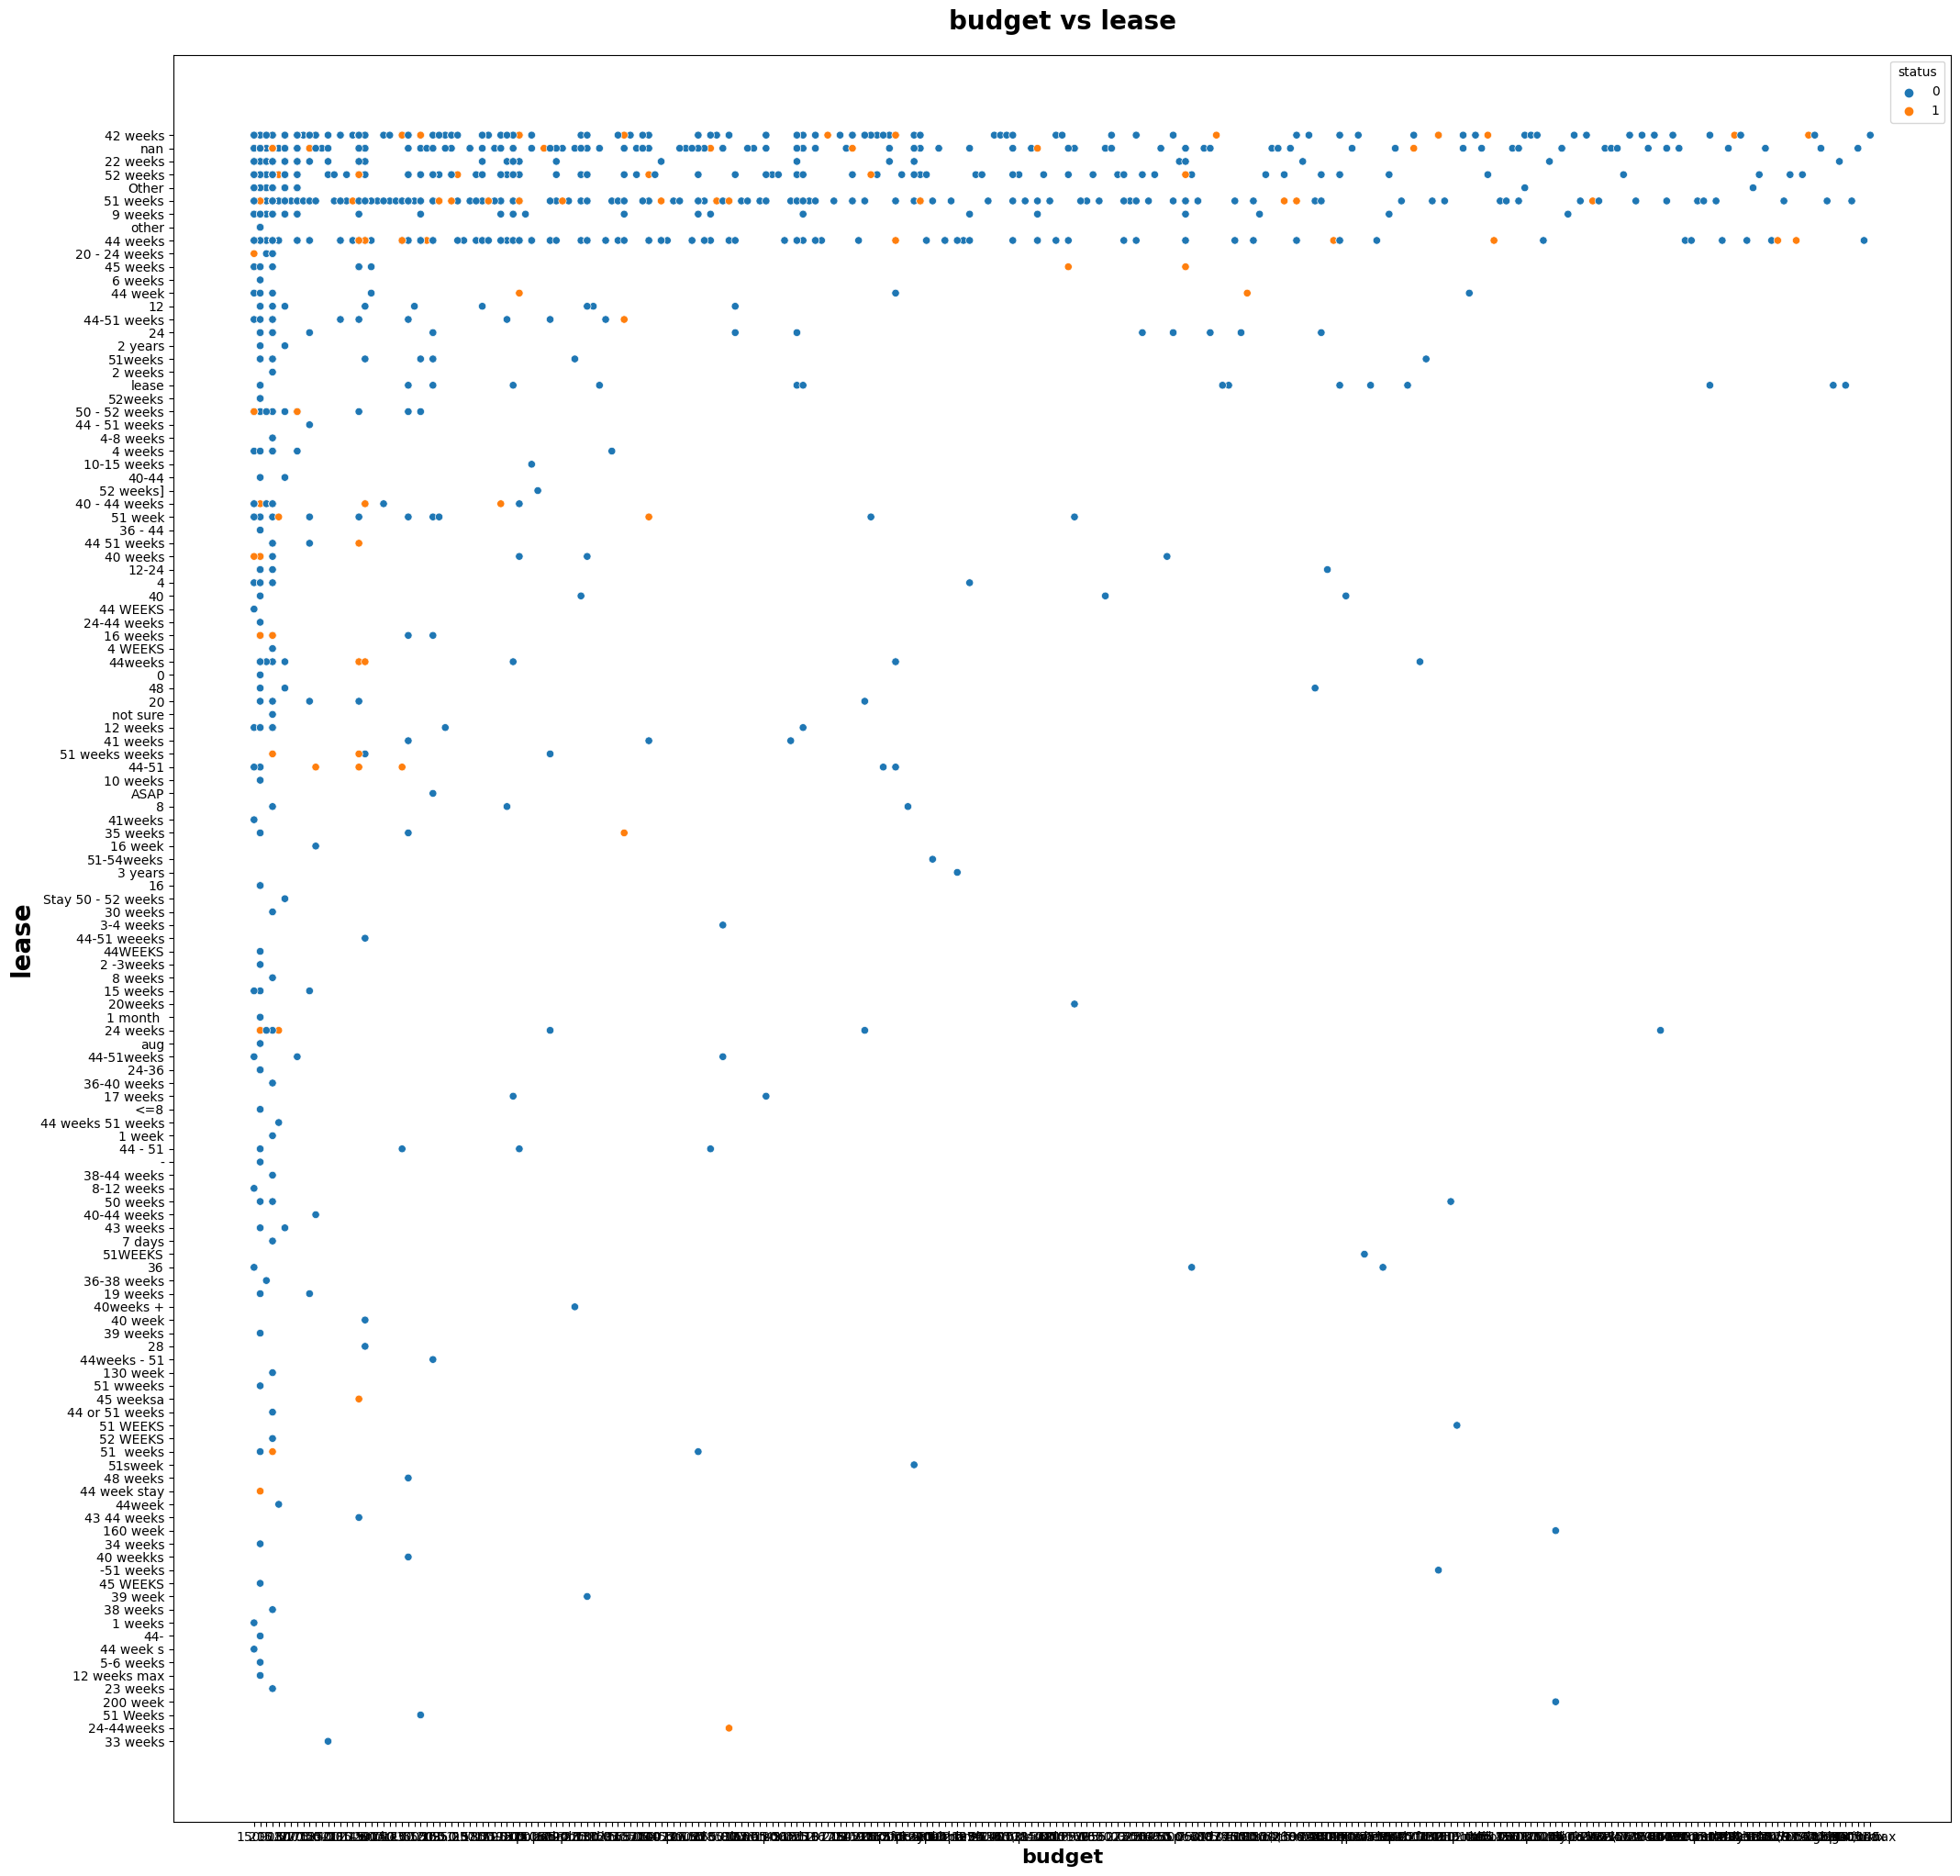

In [58]:
plt.subplots(figsize=(25,25))
sns.scatterplot(x="budget", y='lease', data=df,ec = "white",color='b', hue='status')
plt.title("budget vs lease", weight="bold",fontsize=20, pad=20)
plt.ylabel("lease", weight="bold", fontsize=20)
plt.xlabel("budget", weight="bold", fontsize=16)
plt.show()